In [455]:
# main libraries
import pandas as pd
import numpy as np
#import time
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn import preprocessing , decomposition , neighbors
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib


import time

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.decomposition import PCA

import random
import warnings
warnings.filterwarnings('ignore')


import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import dash
import plotly.express as px
import random
import plotly.figure_factory as ff

from category_encoders.one_hot import OneHotEncoder

# modelling 
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score

from sklearn.svm import LinearSVR, SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer

# split the data 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, KFold
# impute the data 
from sklearn.impute import SimpleImputer
# normalize the data 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Encode the data 
from sklearn.preprocessing import LabelEncoder, RobustScaler
from keras.utils import to_categorical
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from sklearn.metrics import r2_score, mean_squared_error


plt.style.use('seaborn')

In [456]:
#data_2016= pd.read_csv('2016-building-energy-benchmarking.csv')
#data_2016.head()
pd.set_option('display.max_columns', None)
data= pd.read_csv("data_clean.csv")
data.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier
0,1,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6981428.0,7097539.0,2023032.0,1.080307e+06,3686160.0,12724.00000,1272388.0,249.43,2.64,No,NaN,Compliant,NaN
1,2,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,Hotel,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86,False,NaN,Compliant,NaN
2,3,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,Hotel,NaN,18.0,96.600000,99.700000,242.700000,246.500000,73130656.0,75506272.0,19660404.0,1.458393e+07,49762435.0,37099.00000,3709900.0,2061.48,1.92,Yes,NaN,Compliant,NaN
3,5,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,NaN,1.0,460.400000,462.500000,636.300000,643.200000,28229320.0,28363444.0,23458518.0,8.115210e+05,2769023.0,20019.00000,2001894.0,1936.34,31.38,No,NaN,Compliant,High Outlier
4,8,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,175580,62000,113580,Hotel,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.0,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88,False,NaN,Compliant,NaN


In [345]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OSEBuildingID,3432.0,2.118475e+04,1.221184e+04,1.0,19974.250000,2.310950e+04,2.597650e+04,5.022600e+04
CouncilDistrictCode,3432.0,4.447261e+00,2.119874e+00,1.0,3.000000,4.000000e+00,7.000000e+00,7.000000e+00
YearBuilt,3432.0,1.968360e+03,3.318290e+01,1900.0,1948.000000,1.974000e+03,1.997000e+03,2.015000e+03
NumberofBuildings,3431.0,1.096765e+00,2.123166e+00,0.0,1.000000,1.000000e+00,1.000000e+00,1.110000e+02
NumberofFloors,3432.0,4.688228e+00,5.458473e+00,0.0,2.000000,4.000000e+00,5.000000e+00,9.900000e+01
PropertyGFATotal,3432.0,9.462755e+04,2.173894e+05,11285.0,28463.500000,4.413300e+04,9.029250e+04,9.320156e+06
PropertyGFAParking,3432.0,9.691182e+03,3.457360e+04,-3.0,0.000000,0.000000e+00,0.000000e+00,5.126080e+05
PropertyGFABuilding(s),3432.0,8.493637e+04,2.049052e+05,3636.0,27266.000000,4.225600e+04,8.212375e+04,9.320156e+06
ENERGYSTARScore,2652.0,6.788876e+01,2.726677e+01,1.0,52.000000,7.550000e+01,9.000000e+01,1.000000e+02
SiteEUI(kBtu/sf),3429.0,5.480163e+01,5.720242e+01,0.0,27.700001,3.820000e+01,6.010000e+01,8.344000e+02


In [457]:
indexNames = data[data["SourceEUIWN(kBtu/sf)"] < 0].index
data.drop(indexNames, inplace=True)
indexNames_ = data[data["SourceEUI(kBtu/sf)"] < 0].index
data.drop(indexNames_, inplace=True)
indexNames__ = data[data["PropertyGFAParking"] < 0].index
data.drop(indexNames__, inplace=True)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OSEBuildingID,3429.0,2.117270e+04,1.220634e+04,1.0,19969.000000,2.310800e+04,2.597500e+04,5.022600e+04
CouncilDistrictCode,3429.0,4.449111e+00,2.119833e+00,1.0,3.000000,4.000000e+00,7.000000e+00,7.000000e+00
YearBuilt,3429.0,1.968339e+03,3.318417e+01,1900.0,1948.000000,1.974000e+03,1.997000e+03,2.015000e+03
NumberofBuildings,3428.0,1.096849e+00,2.124093e+00,0.0,1.000000,1.000000e+00,1.000000e+00,1.110000e+02
NumberofFloors,3429.0,4.685914e+00,5.459748e+00,0.0,2.000000,4.000000e+00,5.000000e+00,9.900000e+01
PropertyGFATotal,3429.0,9.467204e+04,2.174786e+05,11285.0,28467.000000,4.416200e+04,9.037200e+04,9.320156e+06
PropertyGFAParking,3429.0,9.699662e+03,3.458754e+04,0.0,0.000000,0.000000e+00,0.000000e+00,5.126080e+05
PropertyGFABuilding(s),3429.0,8.497237e+04,2.049905e+05,3636.0,27267.000000,4.226000e+04,8.223400e+04,9.320156e+06
ENERGYSTARScore,2649.0,6.786674e+01,2.727268e+01,1.0,52.000000,7.500000e+01,9.000000e+01,1.000000e+02
SiteEUI(kBtu/sf),3426.0,5.482306e+01,5.722056e+01,0.0,27.700001,3.825000e+01,6.010000e+01,8.344000e+02


In [104]:
# Mttre les valeurs negative a nan

#data.loc[data["SourceEUIWN(kBtu/sf)"] < 0, "SourceEUIWN(kBtu/sf)"] = np.nan
#data.loc[data["SourceEUI(kBtu/sf)"] < 0, "SourceEUI(kBtu/sf)"] = np.nan
#data.loc[data["PropertyGFAParking"]<0, "PropertyGFAParking"] = np.nan
#num = data._get_numeric_data()
#num[num < 0] = 0
#data.describe().T

# Identify Types of Features

In [105]:
dtypes = data.dtypes
cols_numeric = dtypes[dtypes != object].index.tolist()



# choose any numeric column with less than 13 values to be
# "discrete". 13 chosen to include months of the year.
# other columns "continuous"
col_nunique = dict()

for col in cols_numeric:
    col_nunique[col] = data[col].nunique()
    
col_nunique = pd.Series(col_nunique)

cols_discrete = col_nunique[col_nunique<13].index.tolist()
cols_continuous = col_nunique[col_nunique>=13].index.tolist()

print(len(cols_numeric),'numeric columns, of which',
      len(cols_continuous),'are continuous and',
      len(cols_discrete),'are discrete.')

22 numeric columns, of which 21 are continuous and 1 are discrete.


In [106]:
data['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily           1009
Mid-Rise Multifamily            567
Small- and Mid-Sized Office     299
Other                           266
Large Office                    176
K-12 School                     141
Mixed Use Property              132
High-Rise Multifamily           106
Warehouse                       102
Retail Store                    100
Non-Refrigerated Warehouse       87
Hotel                            76
Worship Facility                 72
Senior Care Community            45
Medical Office                   43
Distribution Center\n            32
Distribution Center              21
Supermarket/Grocery Store        19
Supermarket / Grocery Store      18
Residence Hall                   17
Self-Storage Facility\n          16
University                       15
Self-Storage Facility            12
Refrigerated Warehouse           12
College/University               10
Hospital                         10
Restaurant                        7
Residence Hall/Dormitory    

In [370]:
data['BuildingType'].value_counts()

NonResidential          1487
Multifamily LR (1-4)    1041
Multifamily MR (5-9)     584
Multifamily HR (10+)     110
SPS-District K-12         99
Nonresidential COS        86
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [371]:
data['Neighborhood'].value_counts()

DOWNTOWN                  587
EAST                      458
MAGNOLIA / QUEEN ANNE     429
GREATER DUWAMISH          379
NORTHEAST                 288
LAKE UNION                257
NORTHWEST                 222
NORTH                     191
SOUTHWEST                 166
BALLARD                   136
CENTRAL                   135
SOUTHEAST                  97
DELRIDGE NEIGHBORHOODS     46
DELRIDGE                   41
Name: Neighborhood, dtype: int64

In [372]:
data['LargestPropertyUseType'].value_counts()

Multifamily Housing                                     1690
Office                                                   511
Non-Refrigerated Warehouse                               200
K-12 School                                              141
Retail Store                                             105
Other                                                    104
Hotel                                                     76
Worship Facility                                          71
Distribution Center                                       53
Senior Care Community                                     46
Medical Office                                            45
Supermarket/Grocery Store                                 39
Other - Recreation                                        31
Parking                                                   30
Self-Storage Facility                                     27
College/University                                        25
Residence Hall/Dormitory

In [373]:
data['ComplianceStatus'].value_counts()

Compliant                       3334
Error - Correct Default Data      71
Non-Compliant                     23
Missing Data                       3
Not Compliant                      1
Name: ComplianceStatus, dtype: int64

In [458]:
data['Neighborhood']= data['Neighborhood'].replace({'Central':'CENTRAL' ,'Ballard':'BALLARD' , 'North':'NORTH' , 'Delridge': 'DELRIDGE NEIGHBORHOODS', 'DELRIDGE': 'DELRIDGE NEIGHBORHOODS' , 'Northwest':'NORTHEAST'  })
data['ComplianceStatus']= data['ComplianceStatus'].replace({'Non-Compliant': 'Not Compliant'})
data['DefaultData']= data['DefaultData'].replace({'False': 'No', 'True':'Yes'})
data.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier
0,1,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6981428.0,7097539.0,2023032.0,1.080307e+06,3686160.0,12724.00000,1272388.0,249.43,2.64,No,NaN,Compliant,NaN
1,2,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,Hotel,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86,No,NaN,Compliant,NaN
2,3,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,Hotel,NaN,18.0,96.600000,99.700000,242.700000,246.500000,73130656.0,75506272.0,19660404.0,1.458393e+07,49762435.0,37099.00000,3709900.0,2061.48,1.92,Yes,NaN,Compliant,NaN
3,5,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,NaN,1.0,460.400000,462.500000,636.300000,643.200000,28229320.0,28363444.0,23458518.0,8.115210e+05,2769023.0,20019.00000,2001894.0,1936.34,31.38,No,NaN,Compliant,High Outlier
4,8,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,175580,62000,113580,Hotel,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.0,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88,No,NaN,Compliant,NaN


#  Données manquantes ET données duppliquées


In [459]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Comments,3421,0.997667
Outlier,3337,0.973170
YearsENERGYSTARCertified,3307,0.964421
ENERGYSTARScore,780,0.227472
LargestPropertyUseType,32,0.009332
GHGEmissionsIntensity,4,0.001167
TotalGHGEmissions,4,0.001167
NaturalGas(kBtu),4,0.001167
NaturalGas(therms),4,0.001167
Electricity(kBtu),4,0.001167


In [460]:
#dealing with missing data
data = data.drop((missing_data[missing_data['Percent'] > 0.90]).index,1)
data.isnull().sum().max() #just checking that there's no missing data missing...
data.shape

(3429, 28)

# Duplicated info:
- Determines which duplicates (if any) to mark.

- first : Drop duplicates except for the first occurrence.
- last : Drop duplicates except for the last occurrence.
- False : Drop all duplicates.

In [461]:
data= data.sort_values(by=["OSEBuildingID"])
ligne_duplicate = data.loc[data.duplicated(["OSEBuildingID"],keep=False)]
print("I existe ",data.shape[0]-ligne_duplicate.shape[0], "lignes non duppliquées dans la dataset")

I existe  3429 lignes non duppliquées dans la dataset


In [462]:
data= data.drop_duplicates()
data.shape

(3429, 28)

# Reduction De Dimention: PCA

In [390]:
# SimpleImputer 

def imput(df):
    var_quantitatives = df.select_dtypes(include=['int64', 'float64']).columns
    imr = SimpleImputer(missing_values=np.nan, strategy='median')
    imputed_df_quantitatives = imr.fit_transform(df[var_quantitatives])
    
    var_qualitatives = df.select_dtypes(include=['object', 'bool']).columns
    imrp = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
    imputed_df_qualitatives = imrp.fit_transform(df[var_qualitatives])
    
    imputed_df_quantitatives= pd.DataFrame(data= imputed_df_quantitatives, columns=df[var_quantitatives].columns )
    imputed_df_qualitatives= pd.DataFrame(data= imputed_df_qualitatives, columns=df[var_qualitatives].columns )
    data=pd.concat([imputed_df_quantitatives,imputed_df_qualitatives], axis=1 )
    return data
data_pca=imput(data)      
data_pca.head()

,OSEBuildingID,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType,DefaultData,ComplianceStatus
0,1.0,7.0,1927.0,1.0,12.0,88434.0,0.0,88434.0,65.0,78.900000,80.300000,173.500000,175.100000,6981428.0,7097539.0,2023032.0,1.080307e+06,3686160.0,12724.00000,1272388.0,249.43,2.64,NonResidential,Hotel,DOWNTOWN,Hotel,No,Compliant
1,2.0,7.0,1996.0,1.0,11.0,103566.0,15064.0,88502.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,2.00,2.86,NonResidential,Hotel,DOWNTOWN,Hotel,No,Compliant
2,3.0,7.0,1969.0,1.0,41.0,961990.0,0.0,961990.0,18.0,96.600000,99.700000,242.700000,246.500000,73130656.0,75506272.0,19660404.0,1.458393e+07,49762435.0,37099.00000,3709900.0,2061.48,1.92,NonResidential,Hotel,DOWNTOWN,Hotel,Yes,Compliant
3,5.0,7.0,1926.0,1.0,10.0,61320.0,0.0,61320.0,1.0,460.400000,462.500000,636.300000,643.200000,28229320.0,28363444.0,23458518.0,8.115210e+05,2769023.0,20019.00000,2001894.0,1936.34,31.38,NonResidential,Hotel,DOWNTOWN,Hotel,No,Compliant
4,8.0,7.0,1980.0,1.0,18.0,175580.0,62000.0,113580.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.0,1.573449e+06,5368607.0,88039.98438,8803998.0,8.00,2.88,NonResidential,Hotel,DOWNTOWN,Hotel,No,Compliant


In [396]:
# Plot the PCA with either 2 or 3 reduced components
def plotPCA(df, nComponents):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    df = df.dropna('columns') # drop columns with NaN
    if df.shape[1] < nComponents:
        print(f'No PCA graph shown: The number of numeric columns ({df.shape[1]}) is less than the number of PCA components ({nComponents})')
        return
    df = df.astype('int64','float64') # Cast to float for sklearn functions
    df = StandardScaler().fit_transform(df) # Standardize features by removing the mean and scaling to unit variance
    pca = PCA(n_components = nComponents)
    principalComponents = pca.fit_transform(df)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component ' + str(i) for i in range(1, nComponents + 1)])
    finalDf= pd.concat([principalDf], axis=1)
    pca2 = decomposition.PCA(n_components=4)
    pca2.fit(df)
   
    return finalDf, principalDf, pca2
    
    
    
    
def plotpca_2_3(principalDf,nComponents ):    
    fig = plt.figure(figsize = (8, 8))
    if (nComponents == 3):
        ax = fig.add_subplot(111, projection = '3d')
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_zlabel('Principal Component 3', fontsize = 15)
        ax.set_title('3 component PCA', fontsize = 20)
        ax.scatter(xs = principalDf.iloc[:, 0], ys = principalDf.iloc[:, 1], zs = principalDf.iloc[:, 2])
    else:
        ax = fig.add_subplot(111)
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title('2 component PCA', fontsize = 20)
        ax.scatter(x = principalDf.iloc[:, 0], y = principalDf.iloc[:, 1])
        
        
def PCA_plot (components,imp_data,comp1,comp2):
    plt.figure(figsize=(12, 12))
    for i, (x, y) in enumerate(zip(components[comp1, :], components[comp2, :])):
        # Display origine segment (x, y)
        plt.plot([0, x], [0, y], color='#00FFFF')
        
        plt.text(x, y, imp_data.columns[i], fontsize='12', color='#FFFF99')
 
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.rcParams['axes.facecolor'] = 'black'
    plt.show()
        
     
finalDf_2, principalDf_2, pca_2= plotPCA(data_pca, 2) # 2D PCA
finalDf_3, principalDf_3, pca_2= plotPCA(data_pca, 3) # 3D PCA

finalDf_2.head()

,Principal Component 1,Principal Component 2
0,0.846194,-0.644573
1,1.240397,-0.960420
2,9.507451,3.481875
3,9.876166,-12.361932
4,2.397420,-1.004237


In [392]:
finalDf_3.head()

,Principal Component 1,Principal Component 2,Principal Component 3
0,0.846194,-0.644573,-0.353497
1,1.240397,-0.960420,0.292626
2,9.507451,3.481876,-0.842597
3,9.876165,-12.361935,-2.003818
4,2.397420,-1.004237,0.725734


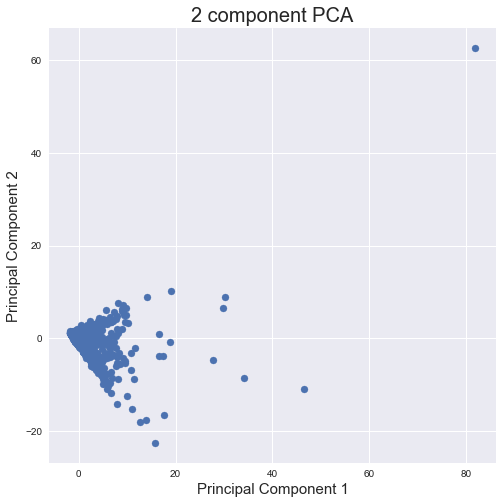

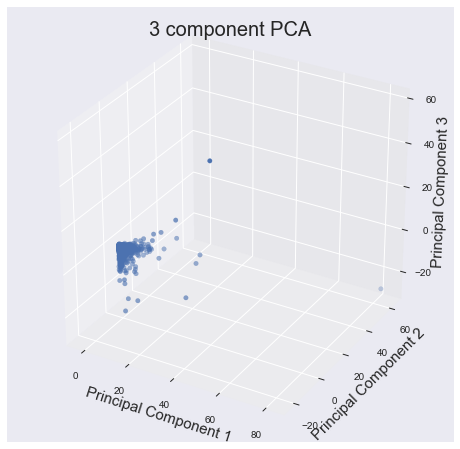

In [393]:
plotpca_2_3(principalDf_2, 2)
plotpca_2_3(principalDf_3, 3)

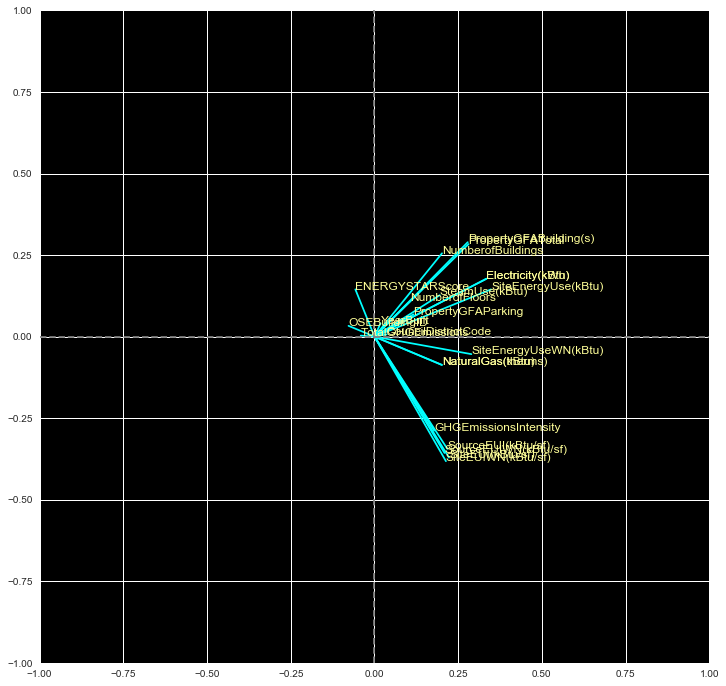

In [397]:
pcs = pca_2.components_
PCA_plot(pcs,data_pca,0,1)

# Reduire la taille des colonnes qualitative :

In [11]:
def N_Category(df):
    
    #Il faut récupérer les colonnes qualitatives
    columns = df.select_dtypes(include=['object']).columns
    
    for i in columns:
        
        counts = df[i].value_counts()
        idx = counts[counts < 100].index
        df.loc[df[i].isin(idx), i] = "Others"
        #print(len(idx), var)
        
    return df

#data=N_Category(data)
#data.head()

#  Pre_Processing: 

# Imputation sur x_train et x_test séparément:

In [322]:

def imput_val_quantitatives(df, x_train, x_test):
    # impute variable quantitatives 
    
    var_quantitatives = df.select_dtypes(include=['int64', 'float64']).columns
    #print(var_quantitatives)
    imr = SimpleImputer(missing_values=np.nan, strategy='median')
    imputed_x_train = imr.fit_transform(x_train[var_quantitatives])
    imputed_x_test = imr.transform(x_test[var_quantitatives])
    
    imputed_x_train= pd.DataFrame(data= imputed_x_train, columns=df[var_quantitatives].columns   )
    imputed_x_test= pd.DataFrame(data= imputed_x_test, columns=df[var_quantitatives].columns  )
    
    return imputed_x_train, imputed_x_test

def imput_val_qualitatives(df, x_train, x_test):
  # impute variable qualitatives 
    var_qualitatives = df.select_dtypes(include=['object', 'bool']).columns
    #print(var_qualitatives)
    imr = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
    
    imputed_x_train = imr.fit_transform(x_train[var_qualitatives])
    imputed_x_test = imr.transform(x_test[var_qualitatives])
    
    imputed_x_train= pd.DataFrame(data= imputed_x_train, columns=df[var_qualitatives].columns )
    imputed_x_test= pd.DataFrame(data= imputed_x_test, columns=df[var_qualitatives].columns )
    return imputed_x_train, imputed_x_test


# Converting Categorical Features
### One hot Encoding: 
- If you have data with specific category values, you can create a column. If the base Label Encoder label type is N, then OHE is the way to create N columns.

- Since only the row containing the content is given as 1, it is called one-hot encoding. Also called dummy encoding in the sense of creating a dummy.

- One Hot encoding , pour les variables qui n'ont que 2 valeurs :
- ComplianceStatus
- DefaultData

### Target Encoders :

- Target encoders pour les variable qualitatives catégorielles :
- BuildingType
- PrimaryPropertyType
- LargestPropertyType



# Target Encoder: 
- Les valeurs de catégorie codées sont calculées selon les formules suivantes: 
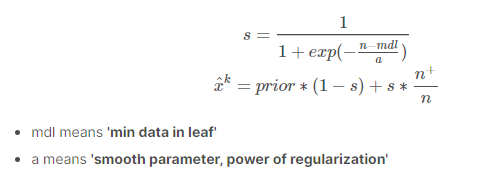

- Target Encoder est puissant, mais il a un énorme inconvénient: 
> Traget leakage (fuite de cible) : il utilise des informations sur la cible.

> Pour réduire l'effet de Target leakage : 
- Augmenter la régularisation
- Ajouter du bruit aléatoire à la représentation de la catégorie dans l'ensemble de données du train (une sorte d'augmentation)
- Utiliser la double validation (en utilisant une autre validation)

> Utilisons en faisant attention au surajustement.



In [323]:
# Methode classique 
def Target_Encoder(data, Columns, Target, train, test): 
    for e_col in Columns:
        means =data.groupby(e_col).Target.mean()
        train[e_col+'_target_encoding'] = data[e_col].map(means)
        test[e_col+'_target_encoding'] = test[e_col].map(means)
    return  data

def Target_encoder(train, test, col, train_Target, test_Target):
    TE_encoder = TargetEncoder()
    train_en = TE_encoder.fit_transform(train[col], train_Target)
    test_en = TE_encoder.transform(test[col],)
    
    train=train.drop(columns=col, axis=1)
    train=pd.concat([train,train_en], axis=1 )

    test=test.drop(columns=col, axis=1)
    test=pd.concat([test,test_en], axis=1 )
    return train, test



# Label Encoder : 

> Label Encoder: Est l'une des méthodes de codage les plus courantes. Une méthode de codage qui convertit les données catégorielles en nombres.

- L'idée simple est de convertir la même catégorie en un nombre avec la même valeur.
- Ainsi, la plage de nombres correspond de 0 à n-1 sous forme d'étiquettes.
- L'inconvénient est que les étiquettes sont ordonnées de manière aléatoire (dans l'ordre existant des données), ce qui peut ajouter du bruit tout en attribuant un ordre inattendu entre les étiquettes.
- En d'autres termes, les données deviennent des données ordinaires (ordinales, ordonnées), ce qui peut entraîner des conséquences inattendues.



In [324]:
def Label_Encoder(col, imputed_x_train, imputed_x_test ): 
    label = LabelEncoder()

    imputed_x_train[col] = label.fit_transform(imputed_x_train[col])
    imputed_x_test[col] = label.fit_transform(imputed_x_test[col])
    return imputed_x_train, imputed_x_test


# One_Hot Encoder & dummy Encoder: 

- Alors, que pouvez-vous faire pour donner des valeurs par catégorie au lieu de les ordonner?
- Si vous avez des données avec des valeurs de catégorie spécifiques, vous pouvez créer une colonne.
- Si le type d'étiquette de base Label Encoder est N, OHE est le moyen de créer N colonnes.
- Puisque seule la ligne contenant le contenu est donnée à 1, il est appelé hot encoder.


In [325]:
def OHE_Encoder(col, imputed_x_train, imputed_x_test ):
    OHE_encoder = OneHotEncoder()
    train_ohe = OHE_encoder.fit_transform(imputed_x_train[col])
    test_ohe = OHE_encoder.transform(imputed_x_test[col])

    imputed_x_train=imputed_x_train.drop(columns=col, axis=1)
    imputed_x_train=pd.concat([imputed_x_train,train_ohe], axis=1 )

    imputed_x_test=imputed_x_test.drop(columns=col, axis=1)
    imputed_x_test=pd.concat([imputed_x_test,test_ohe], axis=1 )
    return imputed_x_train, imputed_x_test

def get_dummies_Encoder(df):
    
    # Categorical boolean mask
    categorical_feature_mask = df.dtypes==object
    # filter categorical columns using mask and turn it into a list
    categorical_cols = df.columns[categorical_feature_mask].tolist()
    
    df_encoded = pd.get_dummies(df, columns = categorical_cols)
    
    return df_encoded

def dummies_Encoder( train, test): 
    traintest=pd.concat([train, test])
    dummies= pd.get_dummies(traintest, columns=traintest.columns, drop_first=True, sparse=True)
    train_ohe=dummies.iloc[: train.shape[0], :]
    test_ohe=dummies.iloc[train.shape[0]:,:]
    train_ohe=train_ohe.sparse.to_coo().tocsr()
    test_ohe=test_ohe.sparse.to_coo().tocsr()
    return train_ohe, test_ohe
    

# Single LR: 

In [18]:
import gc
from sklearn.metrics import roc_auc_score as auc
from sklearn.linear_model import LogisticRegression

from category_encoders.ordinal import OrdinalEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from sklearn.metrics import r2_score, mean_squared_error

def Encoder_List(X_train, X_val, y_train, y_val, feature_list ):
    encoder_list = [ OrdinalEncoder(), OneHotEncoder(), TargetEncoder(), MEstimateEncoder(), JamesSteinEncoder() ]
    for encoder in encoder_list:
        print("Test {} : ".format(str(encoder).split('(')[0]), end=" ")
        train_enc = encoder.fit_transform(X_train[feature_list], y_train)
        #test_enc = encoder.transform(test[feature_list])
        val_enc = encoder.transform(X_val[feature_list])
        lr = LinearRegression()
        lr.fit(train_enc, y_train)
        lr_pred = lr.predict(val_enc)
        score = r2_score(y_val, lr_pred)*100
        print("score: ", score)
        del train_enc
        del val_enc
        gc.collect()
#feature_list=['ComplianceStatus', 'LargestPropertyUseType', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'DefaultData']        
#Encoder_List(imputed_x_train, imputed_x_test, y_train, y_test, feature_list)

# Scaling and Normalization: 

>One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

- in scaling, you're changing the range of your data, while
- in normalization, you're changing the shape of the distribution of your data.

## Scaling:

> La standardisation consiste à transformer des données pour que la distribution empirique suive une loi N(0, 1) . Pour être performants, la plupart des modèles de machine learning nécessitent d’avoir des données dans cette distribution.

> This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

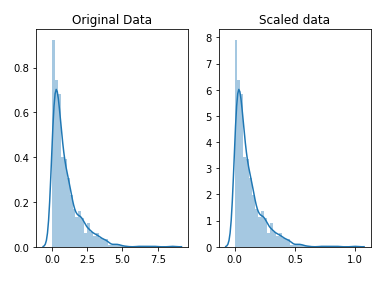



## Normalization: 
> La normalisation est l’action de transformer les données de manière à obtenir une norme (l1 ou l2 ) unitaire. Autrement dit, avec la norme adéquate, la somme des éléments est égale à 1. Par défaut, la norme est dans l2 . Cette transformation est particulièrement utilisée en classification de texte ou pour effectuer du clustering

> Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.
- Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.
- In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)
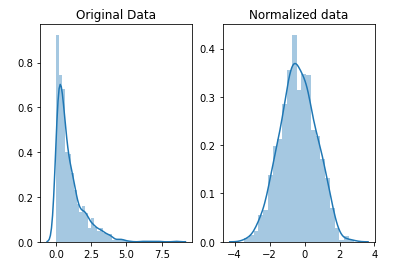


- StandardScaler et MinMaxScaler sont tres sensible aux outliers !!



> RobustScaler : Transforme chaque variable X en étant peu sensible aux outliers 
- X_scaled= (X-mediane)/ IQR 
-  IQR=[Q1, Q3]

In [19]:
from sklearn.preprocessing import MinMaxScaler
def MinMaxSclaer(df):
    min_max=MinMaxScaler()
    df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
    return df_minmax

def Standard_Scaler(x_train, x_test):
    scaler=StandardScaler()
    x_train= scaler.fit_transform(x_train)
    x_test=scaler.transform(x_test)
    return x_train, y_train



# Distribution normal: 
- les distributions de nos variables ne sont pas normales car très asymétriques à gauche. Nous allons donc rendre ces distributions normales.

In [20]:
def log_noramlize(data, type_data, target, idx_data):
    # Normalize the training data 
    if data.shape[1] > 1:
        
        # variable quantitative
        var_quantitatives = data.select_dtypes(include=['int64', 'float64']).columns
        data_normalized = np.log(data[var_quantitatives])
        
        #variable qualitative
        colonnes = data.select_dtypes(include=['object']).columns

        #concat (var qualitative, normalize quantitative)
        data = pd.concat([data_normalized, data[colonnes]], axis=1)
    # normlize the target data
    else: 
        data = np.log(data)
        if type_data == "train":
            data = pd.DataFrame(data, columns=[target], index = idx_data)
        else:
            data = pd.DataFrame(data, columns=[target], index = idx_data)
            
    return data

# The Outliars: 

In [21]:

def Out_liars(df, target, etape):
    
    var_quantitatives = df.select_dtypes(include=['int64', 'float64']).columns
    var_qualitatives = df.select_dtypes(include=['object']).columns
    
    #En premier, on remplace les valeurs négatives en valeurs positives
    df1 = pd.DataFrame(df.loc[:,var_quantitatives].abs(), columns=df[var_quantitatives].columns, index=df[var_quantitatives].index)
    df2 = df.loc[:, var_qualitatives]
    df = pd.concat([df2,df1], axis=1)
    
    #Méthode de suppression des outliers par les interquartiles
    if etape == 1:
        Q1 = df[target].quantile(0.25)
        Q3 = df[target].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[target] < (Q1 - 1.5 * IQR)) |(df[target] > (Q3 + 1.5 * IQR)))]
    
    return df

# function to detect outliers based on the predictions of a model
def find_outliers(model, X, y, sigma=3):

    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(X,y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid)/std_resid    
    outliers = z[abs(z)>sigma].index
    
    # print and plot the results
    print('R2=',model.score(X,y))
    print('rmse=',rmse(y, y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers
#outliears= find_outliers(model, X, y, sigma=3)

# LA MODELISATION: 

In [424]:

def modilization(data, target):
    
    # step 1: drop the nan value in the target
    data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
    data= data.dropna(subset=[target]) 
    # put the inf value to np.nan
    #data[data==np.inf]=np.nan
    
    #step 2 : Outliers
    #print(data.shape[0], "observations initiales")
    #data_droped = Out_liars(data, target, 1)
    #print(data_droped.shape[0], "après suppressions outliers") 
    #data_droped[data_droped==np.inf]=np.nan
    #data_droped.replace([np.inf, -np.inf], np.nan, inplace=True) 
    
    
    #step 3 : Echantillonage
    
    y= data[target]
    plt.hist(y)
    X=data.drop(columns=[target, 'CouncilDistrictCode', 'SiteEUI(kBtu/sf)', 'OSEBuildingID', 'GHGEmissionsIntensity', 
           'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','ENERGYSTARScore', 
           'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
           'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)'] )


    # Splitting the feature array and label array keeping 70% for the training sets 
    x_train, x_test, y_train, y_test= train_test_split(X, y, train_size=0.7, random_state=52222)
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

    #step 4 : Imputation on the train and the test data 
    imp_x_train, imp_x_test = imput_val_quantitatives(X, x_train, x_test)
    impute_x_train, impute_x_test = imput_val_qualitatives(X, x_train, x_test)

    imputed_x_train = pd.concat([imp_x_train,impute_x_train], axis=1)
    imputed_x_test= pd.concat([imp_x_test ,impute_x_test], axis=1)
    
    
    
    #step 5 : Passage au log des targets
    y_train= np.log1p(y_train)
    y_test=np.log1p(y_test)
    #step 6:  Target Encoding 
    columns_TE=['BuildingType', 'PrimaryPropertyType', 'Neighborhood']
    imputed_x_train, imputed_x_test=Target_encoder(imputed_x_train, imputed_x_test, columns_TE, y_train, y_test)
    imputed_x_train.head()

    # setp 6:  Label Encoding 
    colums_LE=['DefaultData']
    imputed_x_train, imputed_x_test= Label_Encoder(colums_LE, imputed_x_train, imputed_x_test )

    # step 7: One Hot Encoding 
    columns_OHE=['ComplianceStatus', 'LargestPropertyUseType']
    imputed_x_train, imputed_x_test=  OHE_Encoder(columns_OHE, imputed_x_train, imputed_x_test )
    print(imputed_x_train.columns)
    
   
    #step 8 : Passage au log des targets
    #y_train= np.log1p(y_train)
    #y_test=np.log1p(y_test)
   # y_train = log_noramlize(np.array(y_train).reshape(-1, 1), "train", target, imputed_x_train.index)
   # y_test = log_noramlize(np.array(y_test).reshape(-1, 1), "test", target, imputed_x_test.index)

    imputed_x_train = imputed_x_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
    imputed_x_test=imputed_x_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
    
    XX= pd.concat([imputed_x_train, imputed_x_test])
    Y= pd.concat([y_train, y_test])
    
    # Step 9: RobustScaler 
    #scaler= RobustScaler()
    #imputed_x_train = scaler.fit_transform(imputed_x_train)
    #imputed_x_test = scaler.transform(imputed_x_test)
    # step 9: StandardScaler 
    
    scaler = StandardScaler()
    imputed_x_train = scaler.fit_transform(imputed_x_train)
    imputed_x_test = scaler.transform(imputed_x_test)
    #imputed_x_train, imputed_x_test= Standard_Scaler(imputed_x_train, imputed_x_test)
    return imputed_x_train, imputed_x_test, y_train, y_test, XX, Y

(1838, 12) (789, 12) (1838,) (789,)
Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)', 'DefaultData',
       'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'ComplianceStatus_1', 'ComplianceStatus_2', 'ComplianceStatus_3',
       'LargestPropertyUseType_1', 'LargestPropertyUseType_2',
       'LargestPropertyUseType_3', 'LargestPropertyUseType_4',
       'LargestPropertyUseType_5', 'LargestPropertyUseType_6',
       'LargestPropertyUseType_7', 'LargestPropertyUseType_8',
       'LargestPropertyUseType_9', 'LargestPropertyUseType_10',
       'LargestPropertyUseType_11', 'LargestPropertyUseType_12',
       'LargestPropertyUseType_13', 'LargestPropertyUseType_14',
       'LargestPropertyUseType_15', 'LargestPropertyUseType_16',
       'LargestPropertyUseType_17', 'LargestPropertyUseType_18',
       'LargestPropertyUseType_19', 'LargestPropertyUseType_20',
       'LargestPropertyUseType_21', 'La

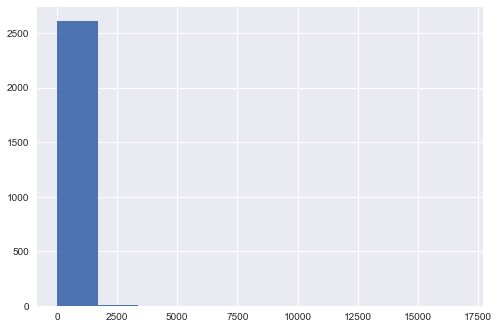

In [425]:
#LANCEMENT DE LA MODELISATION
### TotalGHGEmissions: La quantité totale d'émissions de gaz
target = "TotalGHGEmissions"

imputed_x_train, imputed_x_test, y_train, y_test, X, Y=  modilization(data, target)

plt.hist(y_train)
plt.show()


from sklearn.metrics import mean_absolute_error, mean_squared_error
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid={'max_depth': range(3,7),'n_estimators': (10, 50, 100, 1000),},
cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(X, Y)
rfc = grid_result.best_estimator_  
rfc.fit(imputed_x_train,y_train)
rfc_pred=rfc.predict(imputed_x_test)
print(rfc_pred)
print('RF Train Score: ',rfc.score(imputed_x_train,y_train))
print('RF Test Score: ',rfc.score(imputed_x_test,y_test))
print('RF MAE :',mean_absolute_error(y_test,rfc_pred))
print('RF RMSE :',np.sqrt(mean_squared_error(y_test,rfc_pred)))

# Fit and Optimise Models
- To avoid repeating code I create a function to perform the fitting process for each model type I try. I use k-fold cross-validation to reduce the chances of overfitting the training data - specifically 5-fold cross-validation repeated 5 times (another choice mainly to try another function I hadn't used before - sklearn.model_selection.RepeatedKFold). The parameters of each model are optimised using a grid search, and the function returns the best model found and some stats on the model performance.


## The models I optimise are:

### Linear Regression:

- sklearn.linear_model.Ridge
- sklearn.linear_model.Lasso
- sklearn.linear_model.ElasticNet

### Support Vector Machines:

- sklearn.svm.LinearSVR
- sklearn.svm.SVR

### Nearest Neighbours:
 - sklearn.neighbors.KNearestNeighborsRegressor
 
###  Tree Based:

- sklearn.ensemble.RandomForestRegressor
- sklearn.ensemble.GradientBoostingRegressor
- xgboost.XGBRegressor

### Neural Network
- sklearn.neural_network.MLPRegressor


> Repeats K-Fold n times with different randomization in each repetition.
- n_splits= Number of folds. Must be at least 2.
- n_repeats int, default=10 : Number of times cross-validator needs to be repeated.
-Example:
- X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
- y = np.array([0, 0, 1, 1])
- rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=2652124)
- for train_index, test_index in rkf.split(X):
   -  print("TRAIN:", train_index, "TEST:", test_index)
   -  X_train, X_test = X[train_index], X[test_index]
   -  y_train, y_test = y[train_index], y[test_index]
    
    
- TRAIN: [0 1] TEST: [2 3]
- TRAIN: [2 3] TEST: [0 1]
- TRAIN: [1 2] TEST: [0 3]
- TRAIN: [0 3] TEST: [1 2]    


# Grid Search: 
> Search all the given hyper-parameter configurations

- Advantages:

- Simple implementation.

- Disadvantages:
- Time-consuming,
- Only efficient with categorical HPs.
>

- 1.estimator: Pass the model instance for which you want to check the hyperparameters.
- 2.params_grid: the dictionary object that holds the hyperparameters you want to try
- 3.scoring: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric
- 4.cv: number of cross-validation you have to try for each selected set of hyperparameters
- 5.verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV
- 6.n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors. 

In [426]:
#.best_params_
#from sklearn.metrics import mean_absolute_percentage_error
# metric for evaluation
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)

# scorer to be used in sklearn model fitting
rmse_scorer = make_scorer(rmse, greater_is_better=False)

#def NMSE(y_true,y_pred):
 #   nmse= mean_absolute_percentage_error(y_true, y_pred)
 #   return nmse


def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    #print ('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     return r2

def two_score(y_true,y_pred):    
    MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    score = R2(y_true,y_pred)
    return score

def two_scorer():
    return make_scorer(two_score, greater_is_better=True) # change for false if using MSE


In [427]:
def train_model(model, param_grid=[], X=[], y=[], 
                splits=5, repeats=5):
    
    # create cross-validation method
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats)
    # perform a grid search if param_grid given
    if len(param_grid)>0:
        # setup grid search parameters
        gsearch = GridSearchCV(model, param_grid, cv=rkfold,
                               scoring= 'r2',
                               verbose=1, return_train_score=True, n_jobs=-1)

        
        
        t0=time.time()
        # search the grid
        gsearch.fit(X,y)
        print("Time Taken :", time.time()-t0, "seconds")
        # cvresults a chercher !!!!!!!!!!!!!!!!!!!!!!!!!
        
        # extract best model from the grid
        model = gsearch.best_estimator_        
        best_idx = gsearch.best_index_

        # get cv-scores for best model
        grid_results = pd.DataFrame(gsearch.cv_results_)       
        cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
        cv_std = grid_results.loc[best_idx,'std_test_score']

    # no grid search, just cross-val score for given model    
    else:
        grid_results = []
        cv_results = cross_val_score(model, X, y, scoring='r2', cv=rkfold)
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)
    
    # combine mean and std cv-score in to a pandas series
    cv_score = pd.Series({'mean':cv_mean,'std':cv_std})

    # predict y using the fitted model
    y_pred = model.predict(X)
    
    # print stats on model performance         
    print('----------------------')
    print(model)
    print('----------------------')
    print('score=',model.score(X,y))
    print('mean_squared_error =', mean_squared_error(y, y_pred, squared=False)) # squared= False > returns Root Mean Square Error   
    #print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y, y_pred))
    print('cross_val: mean=',cv_mean,', std=',cv_std)
    
    # residual plots
    y_pred = pd.Series(y_pred,index=y.index)
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    # calculate z statistic, define outliers to be where |z|>sigma
    # En statistique, un test Z est un terme générique désignant tout 
    #test statistique dans lequel la statistique de test suit une loi normale sous l'hypothèse nulle.
    
    z = (resid - mean_resid)/std_resid    
    n_outliers = sum(abs(z)>3)
    #print(n_outliers)
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y_pred');
    plt.title('corr = {:.3f}'.format(np.corrcoef(y,y_pred)[0][1]))
    
    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y - y_pred');
    plt.title('std resid = {:.3f}'.format(std_resid))
    
    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    plt.xlabel('z')
    plt.title('{:.0f} samples with z>3'.format(n_outliers))

    return model, cv_score, grid_results




In [428]:
# places to store optimal models and scores
opt_models = dict()
score_models = pd.DataFrame(columns=['mean','std'])

# no. k-fold splits
splits=5
# no. k-fold iterations
repeats=5

# Ridge Regression: 

- ||y - Xw||^2_2 + alpha * ||w||^2_2

- alpha{float, ndarray of shape (n_targets,)}, default=1.0 :Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. Alpha corresponds to 1 / (2C) in other linear models such as LogisticRegression or LinearSVC. If an array is passed, penalties are assumed to be specific to the targets.



- Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients.

Fitting 25 folds for each of 60 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    7.2s finished


Time Taken : 7.359957933425903 seconds
----------------------
Ridge(alpha=29.75, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
----------------------
score= 0.46539496928867363
mean_squared_error = 1.0131291704074938
cross_val: mean= 0.41687744588690095 , std= 0.04213165498783593


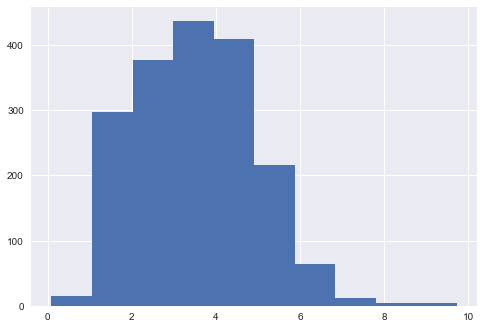

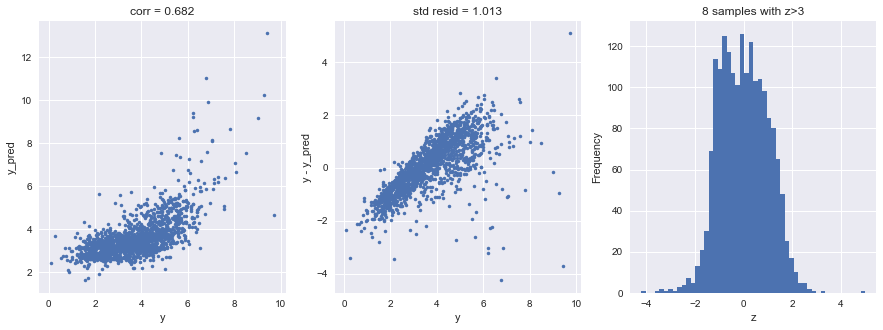

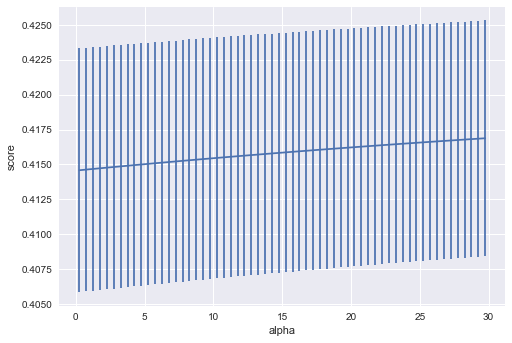

In [429]:
model = 'Ridge'

opt_models[model] = Ridge()
alph_range = np.arange(0.25,30,0.5)
param_grid = {'alpha': alph_range}
plt.hist(y_train)

opt_models[model],cv_score,grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits, repeats)

cv_score.name = model
score_models = score_models.append(cv_score)
# errorbar 
plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']), 
             abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('alpha')
plt.ylabel('score');

In [430]:
grid_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,split15_train_score,split16_train_score,split17_train_score,split18_train_score,split19_train_score,split20_train_score,split21_train_score,split22_train_score,split23_train_score,split24_train_score,mean_train_score,std_train_score
0,0.004481,0.005580,0.00128,0.002933,0.25,{'alpha': 0.25},0.434425,0.481596,0.439343,0.363534,0.367578,0.435903,0.396263,0.443543,0.358128,0.445222,0.397394,0.414941,0.460539,0.424721,0.344043,0.420308,0.371644,0.402132,0.425463,0.436636,0.472163,0.432922,0.503437,0.362559,0.330298,0.414589,0.043611,60,0.466276,0.458785,0.460975,0.476441,0.482830,0.453567,0.472500,0.467461,0.485162,0.465058,0.471658,0.464439,0.459517,0.471554,0.479597,0.465246,0.478622,0.473230,0.465029,0.465578,0.461444,0.460970,0.450045,0.485088,0.479894,0.468839,0.009378
1,0.004800,0.003919,0.00064,0.002170,0.75,{'alpha': 0.75},0.434446,0.481594,0.439344,0.363670,0.367648,0.436021,0.396427,0.443533,0.358148,0.445178,0.397528,0.414981,0.460510,0.424740,0.344136,0.420396,0.371764,0.402145,0.425496,0.436630,0.472202,0.432991,0.503448,0.362552,0.330381,0.414636,0.043583,59,0.466275,0.458784,0.460975,0.476441,0.482830,0.453567,0.472500,0.467461,0.485162,0.465058,0.471658,0.464439,0.459517,0.471554,0.479596,0.465246,0.478622,0.473230,0.465028,0.465578,0.461444,0.460969,0.450045,0.485087,0.479894,0.468838,0.009378
2,0.003520,0.003971,0.00064,0.002169,1.25,{'alpha': 1.25},0.434467,0.481591,0.439344,0.363806,0.367717,0.436139,0.396591,0.443524,0.358168,0.445134,0.397662,0.415020,0.460481,0.424759,0.344229,0.420483,0.371884,0.402157,0.425530,0.436624,0.472240,0.433059,0.503458,0.362545,0.330463,0.414683,0.043556,58,0.466275,0.458784,0.460975,0.476440,0.482829,0.453566,0.472500,0.467461,0.485161,0.465057,0.471657,0.464439,0.459516,0.471554,0.479596,0.465245,0.478621,0.473230,0.465028,0.465577,0.461443,0.460969,0.450044,0.485087,0.479894,0.468838,0.009378
3,0.003200,0.005542,0.00160,0.003200,1.75,{'alpha': 1.75},0.434487,0.481588,0.439344,0.363941,0.367787,0.436256,0.396754,0.443515,0.358188,0.445091,0.397795,0.415059,0.460451,0.424778,0.344322,0.420570,0.372003,0.402169,0.425562,0.436619,0.472278,0.433127,0.503469,0.362537,0.330545,0.414729,0.043529,57,0.466275,0.458784,0.460974,0.476440,0.482829,0.453566,0.472499,0.467460,0.485161,0.465057,0.471657,0.464438,0.459516,0.471553,0.479596,0.465245,0.478621,0.473230,0.465028,0.465577,0.461443,0.460969,0.450044,0.485087,0.479893,0.468838,0.009378
4,0.004480,0.006818,0.00160,0.003919,2.25,{'alpha': 2.25},0.434508,0.481585,0.439343,0.364076,0.367855,0.436372,0.396916,0.443505,0.358208,0.445047,0.397927,0.415098,0.460422,0.424796,0.344414,0.420656,0.372122,0.402181,0.425595,0.436613,0.472315,0.433195,0.503479,0.362530,0.330626,0.414775,0.043502,56,0.466274,0.458783,0.460974,0.476439,0.482828,0.453565,0.472498,0.467460,0.485160,0.465056,0.471656,0.464438,0.459515,0.471553,0.479595,0.465245,0.478620,0.473229,0.465027,0.465576,0.461442,0.460968,0.450043,0.485086,0.479893,0.468837,0.009378


# Lasso Regression: 

- (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

- alphafloat, default=1.0: Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Lasso object is not advised. Given this, you should use the LinearRegression object.

- The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent.
- This model may be very sensitive to outliers.


>
- Les hypothèses de cette régression sont les mêmes que la régression par le moindre carré, sauf que la normalité ne doit pas être présumée
- Il réduit les coefficients à zéro (exactement zéro), ce qui aide certainement dans la sélection des fonctionnalités
- Ceci est une méthode de régularisation et utilise la régularisation l1
- Si le groupe de prédicteurs est fortement corrélé, le lasso n’en sélectionne qu’un et ramène les autres à zéro

Fitting 25 folds for each of 248 candidates, totalling 6200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 4360 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 6200 out of 6200 | elapsed:  1.6min finished


Time Taken : 97.17647576332092 seconds
----------------------
Lasso(alpha=0.009980000000000001, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
----------------------
score= 0.4629406844922235
mean_squared_error = 1.015452063123644
cross_val: mean= 0.41772072531374377 , std= 0.03821690569682567


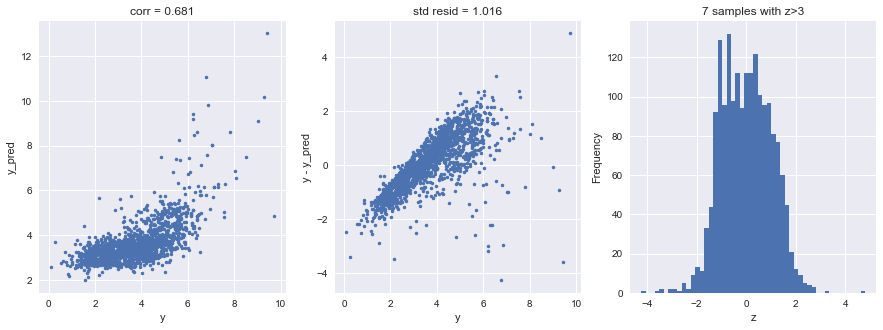

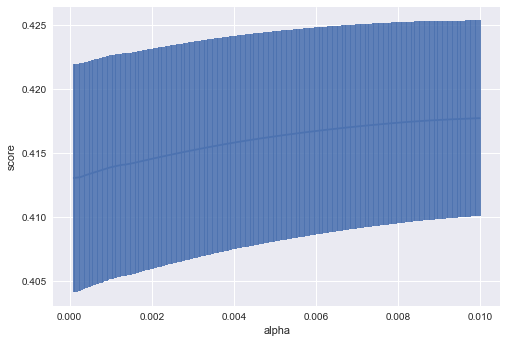

In [431]:
model = 'Lasso'

opt_models[model] = Lasso()
alph_range = np.arange(1e-4,1e-2,4e-5)
param_grid = {'alpha': alph_range}

opt_models[model],cv_score,grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits, repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('alpha')
plt.ylabel('score');

In [432]:
score_models

,mean,std
Ridge,0.416877,0.042132
Lasso,0.417721,0.038217


# ElasticNet Regression: 

- 1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

- a * L1 + b * L2

- alpha = a + b and l1_ratio = a / (a + b)

- l1_ratio (float, default=0.5): The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
- max_iterint, default=1000 : The maximum number of iterations


- Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.
- A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.
- This model may be very sensitive to outliers.

Fitting 25 folds for each of 81 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed:  7.5min finished


Time Taken : 450.53362584114075 seconds
----------------------
ElasticNet(alpha=0.0009000000000000001, copy_X=True, fit_intercept=True,
           l1_ratio=0.9, max_iter=100000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)
----------------------
score= 0.4655308541998703
mean_squared_error = 1.0130004045816368
cross_val: mean= 0.4179841572375354 , std= 0.03809134578137251


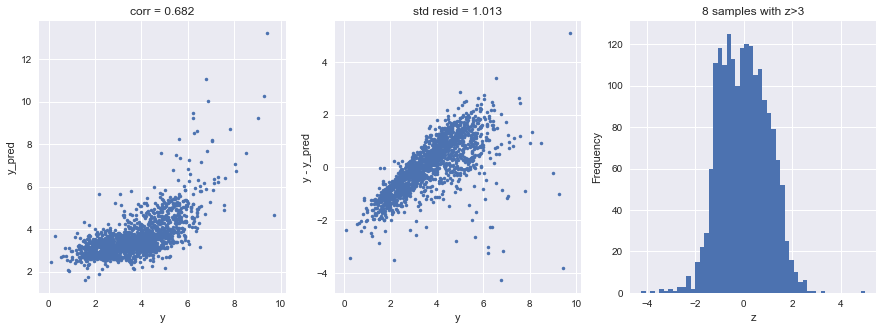

In [433]:
model ='ElasticNet'
opt_models[model] = ElasticNet()

param_grid = {'alpha': np.arange(1e-4,1e-3,1e-4),
              'l1_ratio': np.arange(0.1,1.0,0.1),
              'max_iter':[100000]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid,imputed_x_train,y_train, 
                                              splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

# LinearSVR: 

- Linear Support Vector Regression.

- Similar to SVR with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

- Cfloat, default=1.0: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.


Fitting 25 folds for each of 19 candidates, totalling 475 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 475 out of 475 | elapsed:  1.2min finished


Time Taken : 69.75388503074646 seconds
----------------------
LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=100000,
          random_state=None, tol=0.0001, verbose=0)
----------------------
score= 0.3879989691989625
mean_squared_error = 1.0839877544762428
cross_val: mean= 0.28866461418359685 , std= 0.10595334587382253


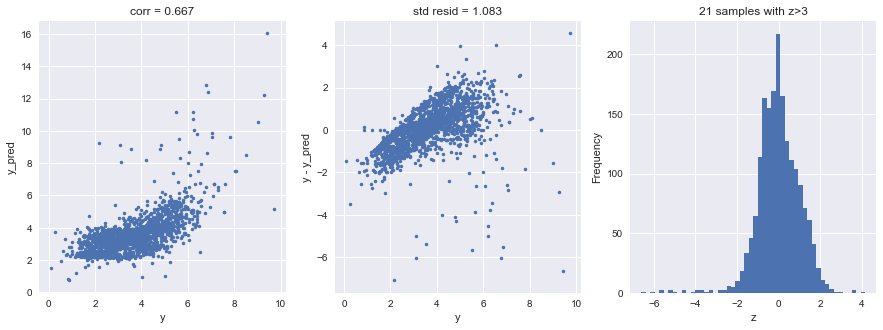

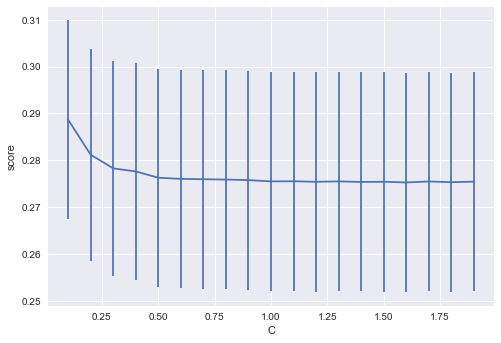

In [434]:
# Linear
model='LinearSVR'
opt_models[model] = LinearSVR()

crange = np.arange(0.1,2.0,0.1)
param_grid = {'C':crange,
             'max_iter':[100000]}

opt_models[model],cv_score,grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits, repeats)
cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(crange, abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('C')
plt.ylabel('score');

# Non_linear: SVR

> kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
- Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.

> gamma{‘scale’, ‘auto’} or float, default=’scale’
- Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
- if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
- if ‘auto’, uses 1 / n_features.


> C float, default=1.0
- Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

Fitting 25 folds for each of 30 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  3.5min finished


Time Taken : 209.39193964004517 seconds
----------------------
SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
----------------------
score= 0.6577330353412701
mean_squared_error = 0.8106451542759916
cross_val: mean= 0.5444706965664561 , std= 0.026076204201405637


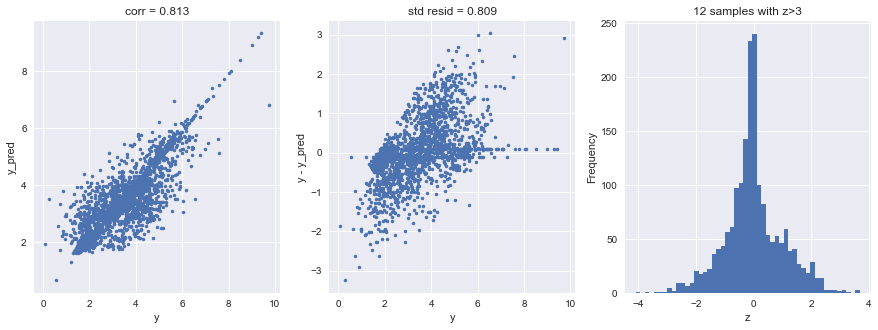

In [435]:
#Non_linear
model ='SVR'
opt_models[model] = SVR()

param_grid = {'C':np.arange(1,21,2),
              'kernel':['poly','rbf','sigmoid'],
              'gamma':['auto']}

opt_models[model],cv_score,grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits, repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 25 folds for each of 28 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  1.3min finished


Time Taken : 77.10400414466858 seconds
----------------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')
----------------------
score= 0.6326815898940606
mean_squared_error = 0.8397879664666283
cross_val: mean= 0.4869289147785076 , std= 0.04912981627374969


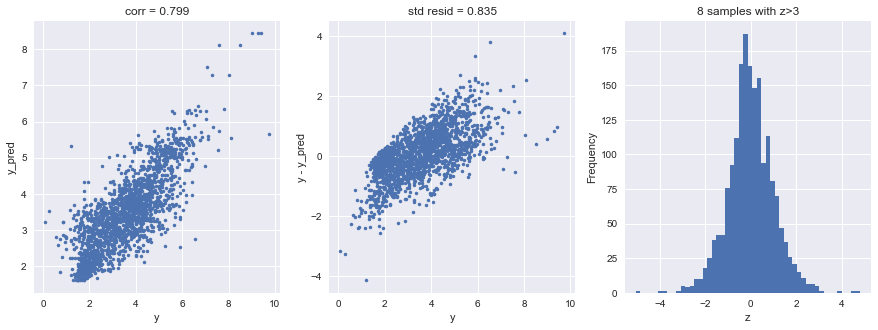

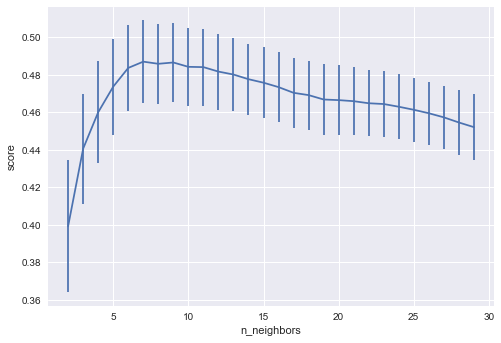

In [436]:
model = 'KNeighbors'
opt_models[model] = KNeighborsRegressor()

param_grid = {'n_neighbors':np.arange(2,30,1)}

opt_models[model],cv_score,grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits, repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(np.arange(2,30,1), abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*1))
plt.xlabel('n_neighbors')
plt.ylabel('score');

# Les forêts aléatoires :
- Nombre d'arbres qui composent la forêt
- Nombre de variables à considérer
- Profondeur de l'arbre
- min_samples_split : Le nombre minimum d’échantillons requis pour scinder un nœud interne


> n_estimators int, default=100
- The number of trees in the forest.

> max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
- The number of features to consider when looking for the best split:
- If int, then consider max_features features at each split.
- If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split.
- If “auto”, then max_features=n_features.
- If “sqrt”, then max_features=sqrt(n_features).
- If “log2”, then max_features=log2(n_features).
- If None, then max_features=n_features.

- Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

Fitting 25 folds for each of 27 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed: 12.1min finished


Time Taken : 733.2748219966888 seconds
----------------------
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
----------------------
score= 0.8960758021253463
mean_squared_error = 0.44669042149470534
cross_val: mean= 0.6062272296111043 , std= 0.030072115316950313


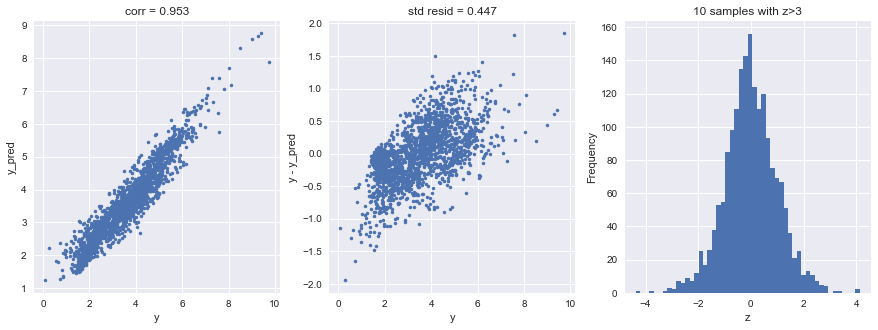

In [437]:
# Tree_Based 
# Random Forest

model = 'RandomForest'
opt_models[model] = RandomForestRegressor()

param_grid = {'n_estimators':[100,150,500], # nbre d'arbre 
              'max_features':[0.5, 0.75, 1.0],
              'min_samples_split':[2,4,6]}

opt_models[model],cv_score,grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits, repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

#  Gradient Boosting Regressor
- n_estimators : Nbr d'étape de boosting a effectuer
- max_depth : profondeur maximale des estimateurs de régression individuels
- min_samples_split : Le nombre minimum d’échantillons requis pour scinder un nœud interne
- learning_rate : regulation de la contribution de chaque arbre
- loss : fonction de perte

Fitting 25 folds for each of 60 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 52.9min finished


Time Taken : 3177.211735725403 seconds
----------------------
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
----------------------
score= 0.7506021783866417
mean_squared_error = 0.6919817284279247
cross_val: mean= 0.6133264315259866 , std= 0.03185343470907864


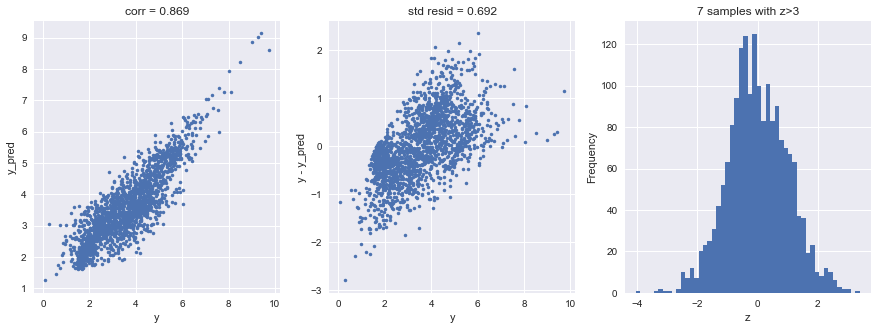

In [438]:
# Gradient Boosting 
model = 'GradientBoosting'
opt_models[model] = GradientBoostingRegressor()

param_grid = {'n_estimators': [500,1000], 
              'max_depth': [4,5,6,7,8], 
              'min_samples_split': [2,3,4], 
              'learning_rate': [0.01,0.1], 
              'loss': ['ls']}

opt_models[model],cv_score,grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits, repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

# XGBRegressor: 
- XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.
- It implements machine learning algorithms under the Gradient Boosting framework.
- XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

Fitting 25 folds for each of 15 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  2.0min finished


Time Taken : 121.87623524665833 seconds
----------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
----------------------
score= 0.7025280352540828
mean_squared_error = 0.7557381049309074
cross_val: mean= 0.6087899938360972 , std= 0.03681969840992043


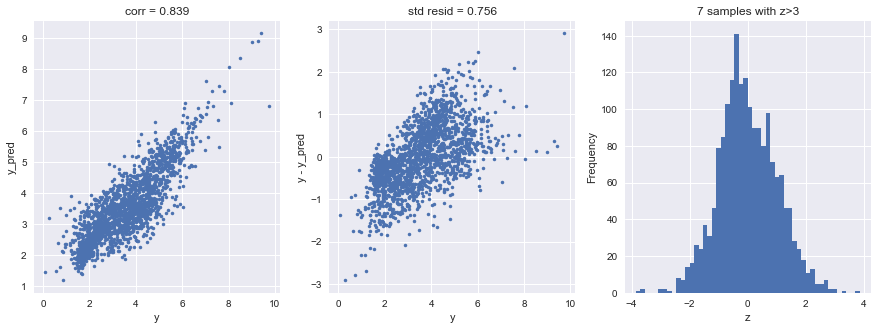

In [439]:
# XGBoost
model = 'XGB'
opt_models[model] = XGBRegressor()

param_grid = {'n_estimators':[100,200,300,400,500],
              'max_depth':[1,2,3],
             }

opt_models[model],cv_score,grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits, repeats)
cv_score.name = model
score_models = score_models.append(cv_score)


#  Le réseau de neurones | Multi-layer Perceptron regressor | Perceptron multi-couches
- alpha : paramètre de régulation
- Nbr de neurones dans chaque couche
- learning_rate : taux d'apprentissage pour les mises à jour de poids
- solver : la méthode d'optimisation du poids


dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
Fitting 25 folds for each of 84 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:  4.4min finished


Time Taken : 266.00128269195557 seconds
----------------------
MLPRegressor(activation='tanh', alpha=50, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
----------------------
score= 0.6485865638415196
mean_squared_error = 0.8214052618580175
cross_val: mean= 0.5847380776242699 , std= 0.03449623225056824


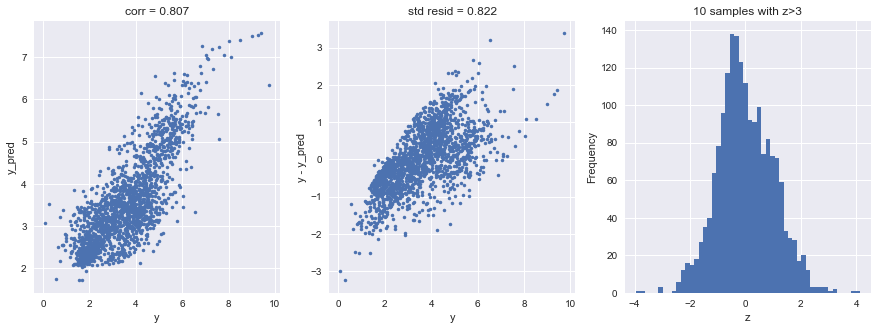

In [440]:
from sklearn.neural_network import MLPRegressor

model = 'MLP'
opt_models[model] = MLPRegressor()
print(MLPRegressor().get_params().keys())
param_grid = {'alpha': [0.001, 0.01, 0.1, 50, 100, 200, 300],
              'hidden_layer_sizes': [(5),(10,10),(7,7,7)],
              'solver': ['lbfgs'],
              'activation': ['relu', 'tanh'],
              'learning_rate' : ['constant', 'invscaling']}


opt_models[model],cv_score,grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits, repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

# Compare Models Sans ENERGYSTARScore: 

,mean,std
LinearSVR,0.288665,0.105953
Ridge,0.416877,0.042132
Lasso,0.417721,0.038217
ElasticNet,0.417984,0.038091
KNeighbors,0.486929,0.049130
SVR,0.544471,0.026076
MLP,0.584738,0.034496
RandomForest,0.606227,0.030072
XGB,0.608790,0.036820
GradientBoosting,0.613326,0.031853


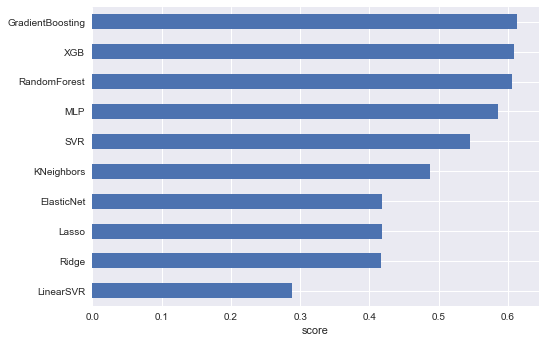

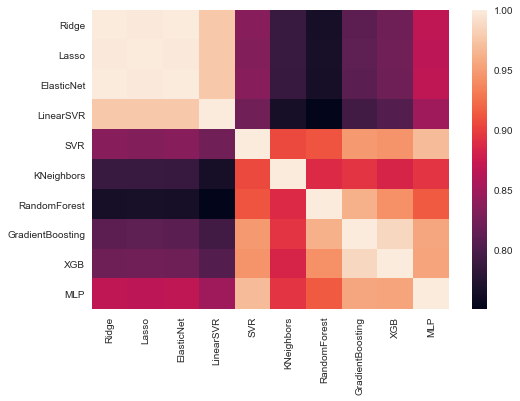

In [441]:

Y_models = pd.DataFrame(index=y_train.index)    
for key, model in opt_models.items():
    Y_models[key] = model.predict(imputed_x_train)

corr_models = pd.DataFrame(Y_models).corr()

score_models = score_models.sort_values(by='mean')

display(score_models)
score_models['mean'].plot.barh()
plt.xlabel('score')

plt.figure()
sns.heatmap(corr_models)

- coef_array of shape (n_features, ) or (n_targets, n_features): Estimated coefficients for the linear regression problem.

# Predict TotalGHGEmissions for the Test Data:

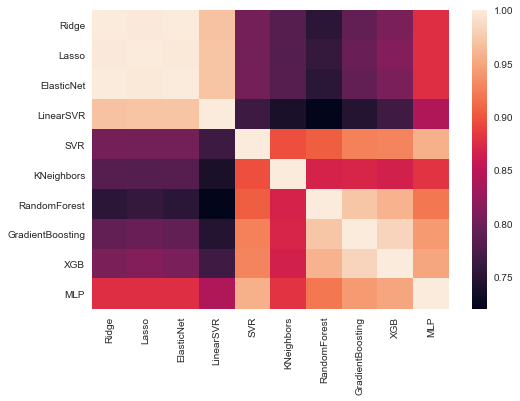

In [442]:
Y_models = pd.DataFrame(index=y_test.index)    

for key, model in opt_models.items():
    Y_models[key] = model.predict(imputed_x_test)

corr_models = pd.DataFrame(Y_models).corr()

plt.figure()
sns.heatmap(corr_models)

# prediction:

In [443]:
import sklearn.metrics as metrics
## List of ML Algorithms, we will use for loop for each algorithms in test Data .
best_regressors = [  RandomForestRegressor( max_features=0.5, min_samples_split=6, n_estimators=150,  random_state = 0),
                     GradientBoostingRegressor(max_depth=5, min_samples_split=2, n_estimators=500, random_state = 0),
                     MLPRegressor(activation='tanh',alpha=200, hidden_layer_sizes=(10, 10), learning_rate='invscaling',  solver='lbfgs',random_state = 0)
         ]



#Fonction dans laquelle sont calculés les scores
def Scores(df, model):
    
    #On remplit le nom du modèle dans le tableau
    df["Modeles"] = model

    #On calcule la RMSE
    
    #df["RMSE"] =np.sqrt(metrics.mean_squared_error(df["y_test"], df["y_pred"]))

    #Pour finir le pourcentage d'erreur
    df["Error%"] = (abs(df["y_test"] - df["y_pred"]) / df["y_test"]) * 100
    
    return df


In [444]:

def prediction(X_train, X_test, y_train, y_test, models):
    T=[]
    df_temp = pd.DataFrame()
    for model in models:
        
        #Entrainement du modèle
        pipe = Pipeline(steps=[('model', model)])
        t0= time.time()
        pipe.fit(X_train, y_train)
        T.append (time.time()-t0)
        #Prédictions
        y_pred = model.predict(X_test)
        
        # Score 
        score= model.score(X_test, y_test)
        #Construction du tableau de résultats
        #Nous créons un tableau par modèle
        #On récupère le nom du modèle
        mod = str(model)
        mod = mod[0:mod.find("(")]
        
        #Création du tableau de résultats
        df1 = pd.DataFrame(y_pred)
        df2 = y_test.reset_index()
        
        #On concatène les prédictions et les vraies valeurs en les passant à l'exponentielle car les valeurs sont en log
        #df3 = pd.concat([np.exp(df2), np.exp(df1)], axis=1, sort=False)
        df3 = pd.concat([df2, df1], axis=1, sort=False)
        df3.columns = ["index", "y_test", "y_pred"]
        df3.drop("index", axis=1, inplace=True)
        
        #On rajoute le nouveau modèle au tableau des résultats
        df_temp = pd.concat([df_temp, Scores(df3, mod)])
        
    return df_temp, T
#On prépare le taleau de synthèse
df_results = pd.DataFrame(columns=["Modeles", "y_test", "y_pred" ,"Error%"])
#Entrainement des modèles
df_temp, T = prediction(imputed_x_train, imputed_x_test, y_train, y_test, best_regressors)
df_results = pd.concat([df_results, df_temp], sort=False)
df_results


,Modeles,y_test,y_pred,Error%
0,RandomForestRegressor,2.135349,2.819595,32.043746
1,RandomForestRegressor,3.263467,3.043776,6.731825
2,RandomForestRegressor,4.449335,3.998738,10.127285
3,RandomForestRegressor,3.178470,2.619479,17.586793
4,RandomForestRegressor,4.237868,5.213328,23.017708
...,...,...,...,...
784,MLPRegressor,6.082675,4.470597,26.502794
785,MLPRegressor,3.553060,3.363079,5.346965
786,MLPRegressor,4.388630,3.097934,29.410005
787,MLPRegressor,3.934567,4.318739,9.764014


In [445]:

#Création d'un tableau avec les résultats moyens de chaque modèle
lst_modeles = df_results["Modeles"].unique()

rmse = []
mean_absolute_percentage_error = []
mean_squared_error = []
median_percent_err=[]
r2 = []

df_analyse = pd.DataFrame()


for modele in lst_modeles:
    print(modele)
    
    df_temp = df_results[df_results["Modeles"] == modele]
    rmse.append(round(np.sqrt(metrics.mean_squared_error(df_temp["y_test"], df_temp["y_pred"])),3))
    mean_absolute_percentage_error.append(round(df_temp["Error%"].mean(),3))
    median_percent_err.append(round(df_temp["Error%"].median(),3))
    
    r2.append(round(r2_score(df_temp["y_test"], df_temp["y_pred"]),3))
    print(r2)
    #mean_absolute_percentage_error.append(round(mean_absolute_percentage_error(df_temp["y_test"], df_temp["y_pred"]),3))
    mean_squared_error.append(round(metrics.mean_squared_error(df_temp["y_test"], df_temp["y_pred"]),3))
    
df_analyse["Modeles"] = lst_modeles  
df_analyse["RMSE"] = rmse
df_analyse["mean_absolute_percentage_error"] = mean_absolute_percentage_error
df_analyse["mean_squared_error"] = mean_squared_error
df_analyse["R2"] = r2
df_analyse['Time']= T

RandomForestRegressor
[0.653]
GradientBoostingRegressor
[0.653, 0.615]
MLPRegressor
[0.653, 0.615, 0.543]


In [446]:
df_analyse

,Modeles,RMSE,mean_absolute_percentage_error,mean_squared_error,R2,Time
0,RandomForestRegressor,0.835,inf,0.697,0.653,0.878643
1,GradientBoostingRegressor,0.880,inf,0.774,0.615,3.104120
2,MLPRegressor,0.959,inf,0.919,0.543,0.177495


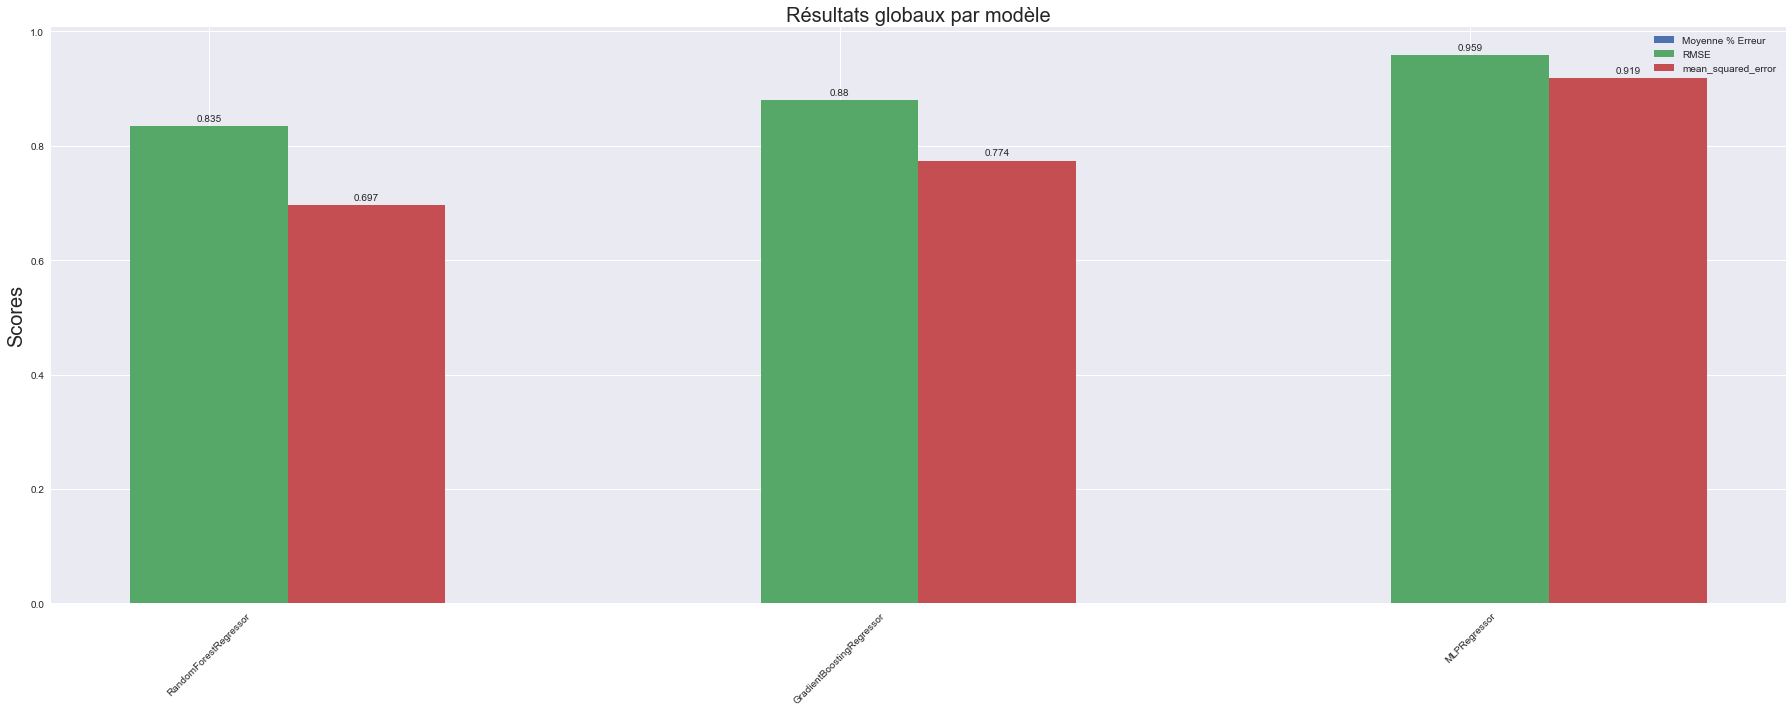

In [447]:
labels = df_analyse["Modeles"].unique()
    
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width, df_analyse["mean_absolute_percentage_error"], width, label='Moyenne % Erreur')
rects2 = ax.bar(x, df_analyse["RMSE"], width, label='RMSE')
rects3 = ax.bar(x + width, df_analyse["mean_squared_error"], width, label='mean_squared_error')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', size=20)
ax.set_title('Résultats globaux par modèle', size=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# Feature Importance: 

- Lorsque les données sont mises à l'échelle( scaled) ou normalisées(standardized) , l'importance ds features dépend inversement de l'écart type (variance) dans les données. Ceci est souhaitable car les features qui ont des valeurs aberrantes devraient avoir plus de variance et devraient donc avoir moins d'importance.!!

---------------------------------------
8 zero coefficients
30 non-zero coefficients
---------------------------------------
Intercept:  3.5302234893263336
---------------------------------------
Top 20 contributers to increased TotalGHGEmissions:
---------------------------------------
PropertyGFABuilding(s)       0.452428
LargestPropertyUseType_5     0.233691
LargestPropertyUseType_4     0.216099
PropertyGFATotal             0.202964
LargestPropertyUseType_10    0.149339
LargestPropertyUseType_13    0.135098
LargestPropertyUseType_6     0.125764
LargestPropertyUseType_19    0.063013
LargestPropertyUseType_18    0.060716
LargestPropertyUseType_21    0.051396
ComplianceStatus_1           0.050526
LargestPropertyUseType_17    0.050309
LargestPropertyUseType_3     0.038983
LargestPropertyUseType_14    0.038935
Neighborhood                 0.036270
LargestPropertyUseType_8     0.029960
LargestPropertyUseType_11    0.013669
LargestPropertyUseType_25    0.010425
LargestPropertyUseType_23   

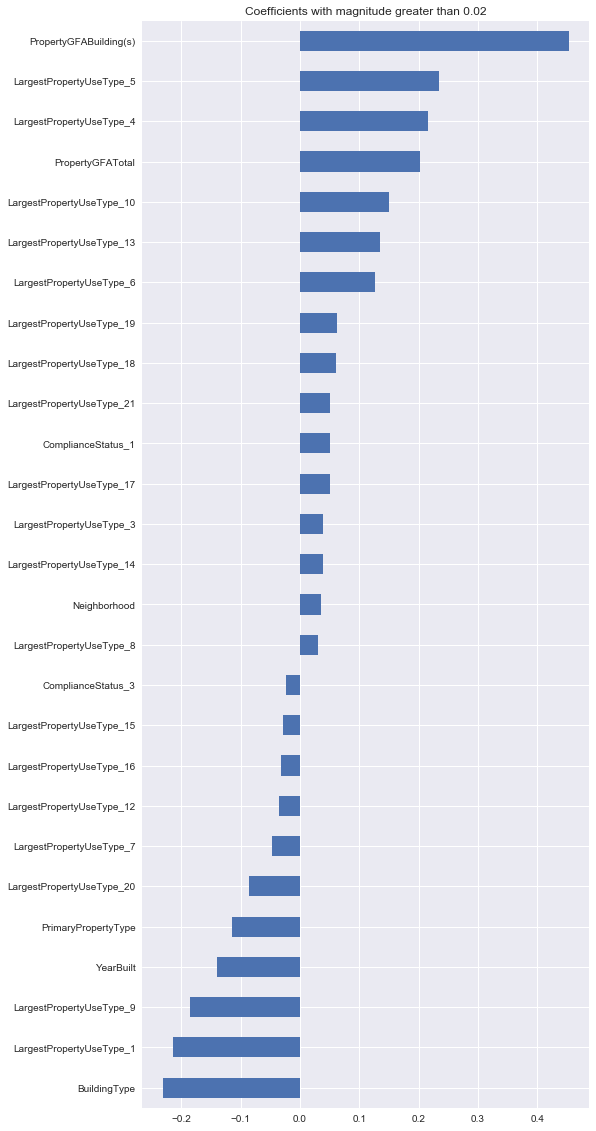

In [448]:
# feature important!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Best model is XGB
#Coefficients are only defined when the linear model is chosen as base learner (booster=gblinear). It is not defined for other base learner types, such as tree learners (booster=gbtree).
# get coefficients from previously optimised ElasticNet model
en_coefs = pd.Series(opt_models['Lasso'].coef_,index=X.columns)

plt.figure(figsize=(8,20))
en_coefs[en_coefs.abs()>0.02].sort_values().plot.barh()
plt.title('Coefficients with magnitude greater than 0.02')

print('---------------------------------------')
print(sum(en_coefs==0),'zero coefficients')
print(sum(en_coefs!=0),'non-zero coefficients')
print('---------------------------------------')
print('Intercept: ',opt_models['Lasso'].intercept_)
print('---------------------------------------')
print('Top 20 contributers to increased TotalGHGEmissions:')
print('---------------------------------------')
print(en_coefs.sort_values(ascending=False).head(20))
print('---------------------------------------')
print('Top 10 contributers to decreased TotalGHGEmissions:')
print('---------------------------------------')
print(en_coefs.sort_values(ascending=True).head(10))
print('---------------------------------------')
print('Zero coefficients:')
print('---------------------------------------')
print(en_coefs[en_coefs==0].index.sort_values().tolist())




Features importances - RandomForestRegressor
PropertyGFATotal            0.303868
PropertyGFABuilding(s)      0.247106
YearBuilt                   0.131906
NumberofFloors              0.063896
PrimaryPropertyType         0.055581
Neighborhood                0.037343
BuildingType                0.028438
LargestPropertyUseType_1    0.022341
PropertyGFAParking          0.021282
LargestPropertyUseType_5    0.018040
dtype: float64

Features importances - GradientBoostingRegressor
PropertyGFATotal            0.478159
PropertyGFABuilding(s)      0.144565
YearBuilt                   0.131287
PrimaryPropertyType         0.066758
LargestPropertyUseType_1    0.030758
LargestPropertyUseType_5    0.025215
NumberofFloors              0.021118
BuildingType                0.015299
LargestPropertyUseType_9    0.012304
Neighborhood                0.010977
dtype: float64

-----------------------------------------------


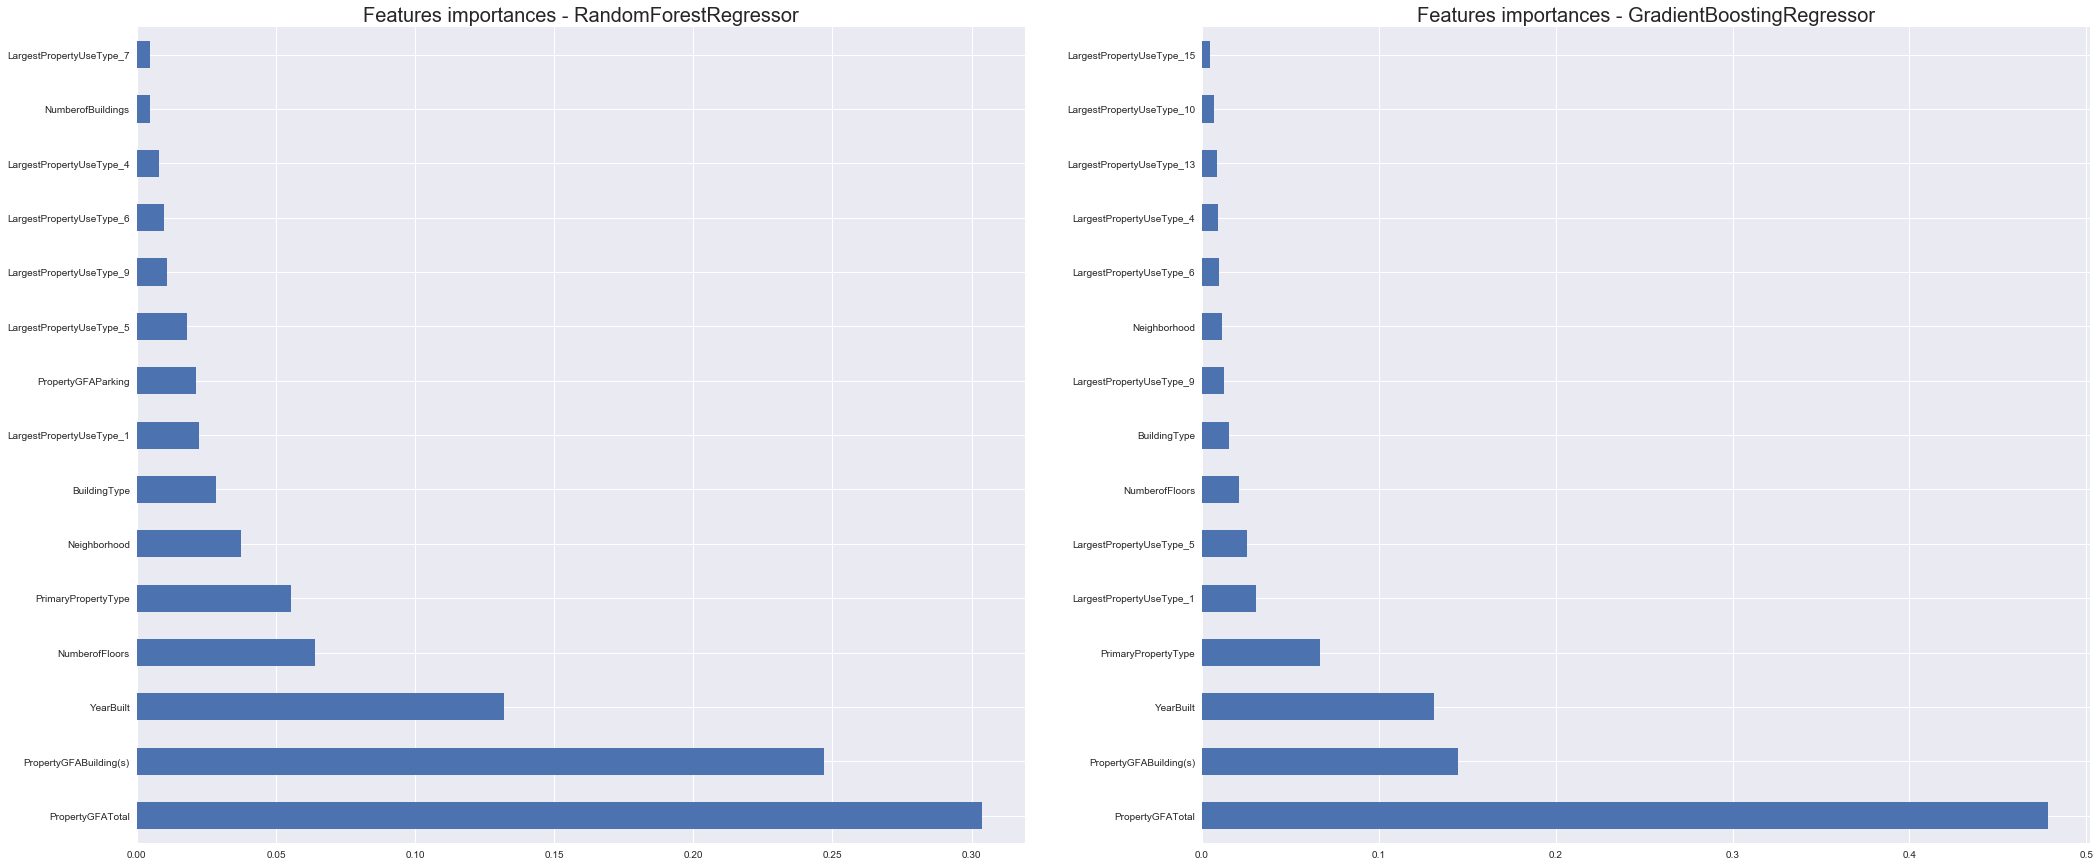

In [449]:
feat_impt_forest = pd.Series(opt_models['RandomForest'].feature_importances_, index=X.columns)
print("Features importances - RandomForestRegressor")
print(feat_impt_forest.nlargest(10))
print("")
feat_impt_GboostR = pd.Series(opt_models['GradientBoosting'].feature_importances_, index=X.columns)
print("Features importances - GradientBoostingRegressor")
print(feat_impt_GboostR.nlargest(10))
print("")
print("-----------------------------------------------")

plt.subplots(figsize=(35,15))
plt.subplot(1, 2, 1)
plt.title("Features importances - RandomForestRegressor", size=20)
feat_impt_forest.nlargest(15).plot(kind='barh')

plt.subplot(1, 2, 2)
plt.title("Features importances - GradientBoostingRegressor", size=20)
feat_impt_GboostR.nlargest(15).plot(kind='barh')

# Learning Curves: 

- learning curve montre l'evolution du model en fonction de la quantité de données qu'on lui fournit . plus la machine dispose de données pour s'entrainer meilleurs sera sa perfermance. quand l'apprentissage attient sa performance c'est inutille d'avoir plus de données !!!!!



"""
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """

RAPPEL : Il y a 1838 observations dans le dataset d'entrainement.


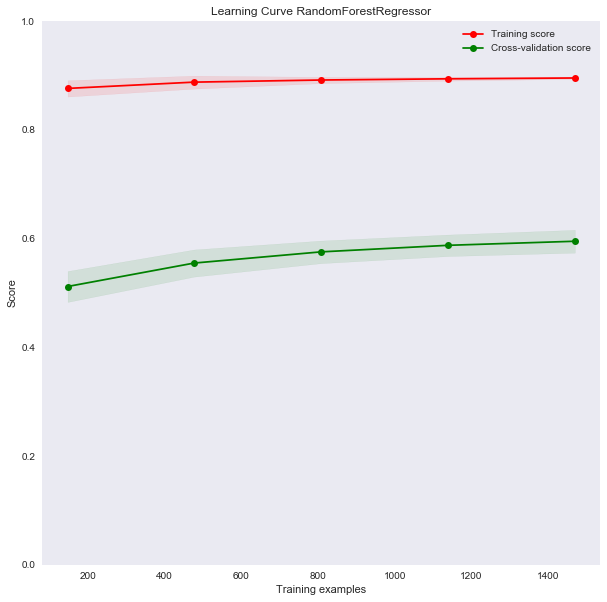

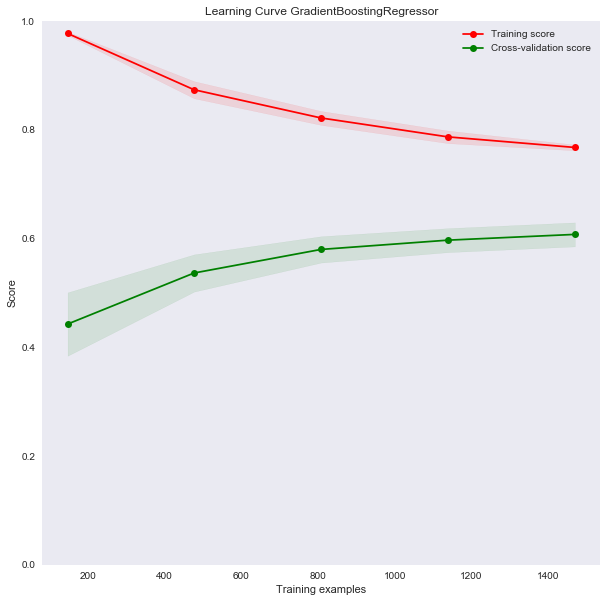

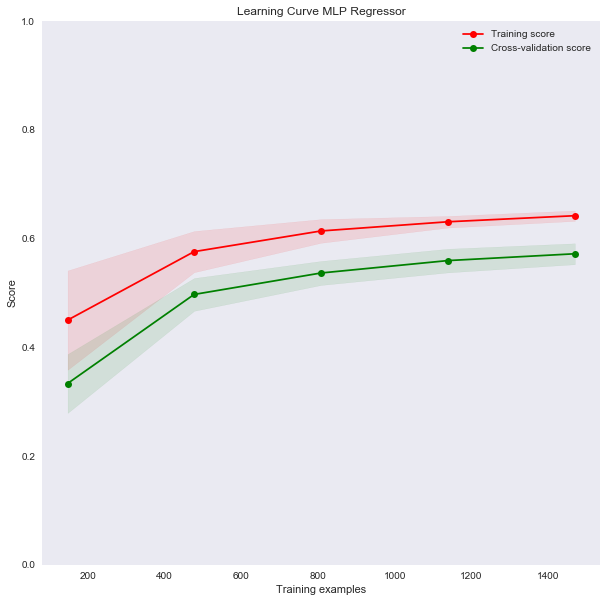

In [450]:
from sklearn.model_selection import learning_curve , ShuffleSplit
# train_sizes=np.linspace(.1, 1.0, 5) on commence avec 10 % de data jusqu'a 100% avec un découpage de 5 

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



#RANDOMFORESTREGRESSOR
#Paramétrage de la fonction de traçage de la courbe
title = "Learning Curve RandomForestRegressor"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(opt_models['RandomForest'], title, imputed_x_train, y_train, ylim=(0, 1), cv=cv, n_jobs=-1)


#########################################################################################
#GRADIENTBOOSTINGREGRESSOR
#Paramétrage de la fonction de traçage de la courbe
title = "Learning Curve GradientBoostingRegressor"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(opt_models['GradientBoosting'], title, imputed_x_train, y_train, ylim=(0, 1), cv=cv, n_jobs=-1)

#########################################################################################
#MLPREGRESSOR
#Paramétrage de la fonction de traçage de la courbe
title = "Learning Curve MLP Regressor"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(opt_models['MLP'], title, imputed_x_train, y_train, ylim=(0, 1), cv=cv, n_jobs=-1)

print("RAPPEL : Il y a", imputed_x_train.shape[0], "observations dans le dataset d'entrainement.")


## Analyse des résultats: 
- Un écart énorme entre le score de validation croisée et le score d'entraînement indique un scénario de variance élevé.
- Réduisez la complexité du modèle ou collectez plus de données

# Prediction de 'SiteEnergyUse(kBtu)' 
## Sans 'ENERGYSTARScore'

In [463]:
def modilization2(data, target, lst):
    # step 1: drop the nan value in the target
    data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
    # put the inf value to np.nan
    #data[data==np.inf]=np.nan
    #data= data.dropna(subset=[target]) 
    # put the inf value to np.nan
    #data[data==np.inf]=np.nan

    #step 2 : Outliers
    #print(data.shape[0], "observations initiales")
    #data_droped = Out_liars(data, target, 1)
    #print(data_droped.shape[0], "après suppressions outliers") 
    #data_droped[data_droped==np.inf]=np.nan
    data.replace([np.inf, -np.inf], np.nan, inplace=True) 
    
    #step 3 : Echantillonage
    y= data[target]
    X=data.drop(columns=[target]+lst)


    # Splitting the feature array and label array keeping 70% for the training sets 
    x_train, x_test, y_train, y_test= train_test_split(X, y, train_size=0.7, random_state=5)
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

    #step 4 : Imputation on the train and the test data 
    imp_x_train, imp_x_test = imput_val_quantitatives(X, x_train, x_test)
    impute_x_train, impute_x_test = imput_val_qualitatives(X, x_train, x_test)

    imputed_x_train = pd.concat([imp_x_train,impute_x_train], axis=1)
    imputed_x_test= pd.concat([imp_x_test ,impute_x_test], axis=1)

    #step 5:  Target Encoding 
    columns_TE=['BuildingType', 'PrimaryPropertyType', 'Neighborhood']
    imputed_x_train, imputed_x_test=Target_encoder(imputed_x_train, imputed_x_test, columns_TE, y_train, y_test)
    #imputed_x_train.head()

    # setp 6:  Label Encoding 
    colums_LE=['DefaultData']
    imputed_x_train, imputed_x_test= Label_Encoder(colums_LE, imputed_x_train, imputed_x_test )

    # step 7: One Hot Encoding 
    columns_OHE=['ComplianceStatus', 'LargestPropertyUseType']
    imputed_x_train, imputed_x_test=  OHE_Encoder(columns_OHE, imputed_x_train, imputed_x_test )

    #step 8 : Passage au log des targets
    y_train= np.log1p(y_train)
    y_test=np.log1p(y_test)
    #y_train = sqrt_noramlize(np.array(y_train).reshape(-1, 1), "train", target, imputed_x_train.index)
    #y_test = sqrt_noramlize(np.array(y_test).reshape(-1, 1), "test", target, imputed_x_test.index)
    imputed_x_train = imputed_x_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
    imputed_x_test=imputed_x_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
    XX= pd.concat([imputed_x_train, imputed_x_test])
    Y= pd.concat([y_train, y_test])
    print(imputed_x_train.columns)
    # step 9: StandardScaler 
    
    scaler = StandardScaler()
    imputed_x_train = scaler.fit_transform(imputed_x_train)
    imputed_x_test = scaler.transform(imputed_x_test)
    #imputed_x_train, imputed_x_test= Standard_Scaler(imputed_x_train, imputed_x_test)

    return imputed_x_train, imputed_x_test, y_train, y_test, XX, Y

In [464]:
#LANCEMENT DE LA MODELISATION
### SiteEnergyUse(kBtu): La quantité annuelle d'énergie consommée par la propriété à partir de toutes les sources d'énergie.
target = "SiteEnergyUse(kBtu)"
lst=[ 'SiteEUI(kBtu/sf)',
           'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
           'SiteEnergyUse(kBtu)','SteamUse(kBtu)', 'ENERGYSTARScore',
           'Electricity(kWh)', 'Electricity(kBtu)', 'OSEBuildingID', 'CouncilDistrictCode', 'YearBuilt' , 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'GHGEmissionsIntensity']
imputed_x_train, imputed_x_test, y_train, y_test, X, Y=  modilization2(data, target, lst)

(1838, 11) (789, 11) (1838,) (789,)
Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)', 'DefaultData',
       'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'ComplianceStatus_1', 'ComplianceStatus_2', 'ComplianceStatus_3',
       'LargestPropertyUseType_1', 'LargestPropertyUseType_2',
       'LargestPropertyUseType_3', 'LargestPropertyUseType_4',
       'LargestPropertyUseType_5', 'LargestPropertyUseType_6',
       'LargestPropertyUseType_7', 'LargestPropertyUseType_8',
       'LargestPropertyUseType_9', 'LargestPropertyUseType_10',
       'LargestPropertyUseType_11', 'LargestPropertyUseType_12',
       'LargestPropertyUseType_13', 'LargestPropertyUseType_14',
       'LargestPropertyUseType_15', 'LargestPropertyUseType_16',
       'LargestPropertyUseType_17', 'LargestPropertyUseType_18',
       'LargestPropertyUseType_19', 'LargestPropertyUseType_20',
       'LargestPropertyUseType_21', 'LargestProperty

In [465]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score
# places to store optimal models and scores
opt_models = dict()
score_models = pd.DataFrame(columns=['mean','std'])

# no. k-fold splits
splits=5
# no. k-fold iterations
repeats=5

# Ridge regressor: 

Fitting 25 folds for each of 23 candidates, totalling 575 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 575 out of 575 | elapsed:    4.2s finished


Time Taken : 4.327428340911865 seconds
----------------------
Ridge(alpha=5.75, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
----------------------
score= 0.6228597453971045
mean_squared_error = 0.6885115679261371
cross_val: mean= 0.5844390299856502 , std= 0.04025422548496583


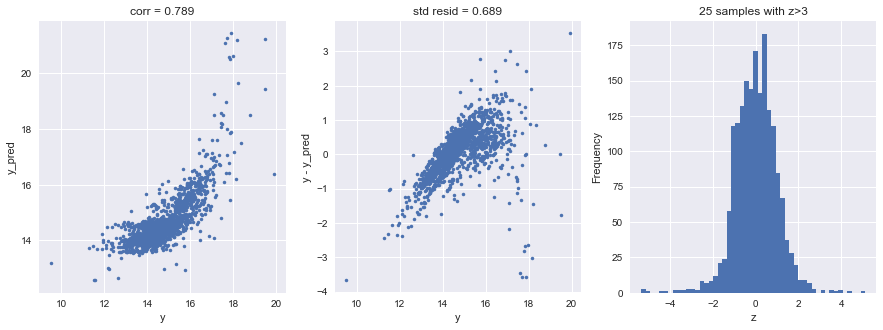

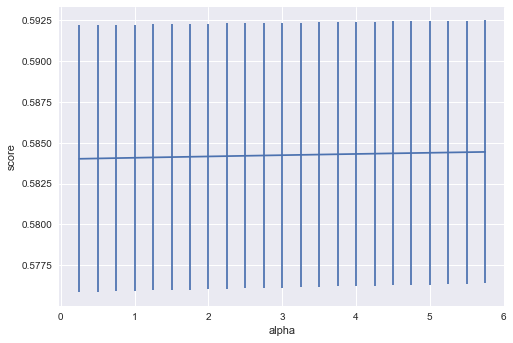

In [466]:
model = 'Ridge'

opt_models[model] = Ridge()
alph_range = np.arange(0.25,6,0.25)
param_grid = {'alpha': alph_range}

opt_models[model],cv_score,grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits, repeats)

cv_score.name = model
score_models = score_models.append(cv_score)
# errorbar 
plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('alpha')
plt.ylabel('score');

Fitting 25 folds for each of 23 candidates, totalling 575 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 568 out of 575 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 575 out of 575 | elapsed:   11.8s finished


Time Taken : 11.980960607528687 seconds
----------------------
Lasso(alpha=0.0009000000000000002, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
----------------------
score= 0.6228253682326619
mean_squared_error = 0.6885429468836402
cross_val: mean= 0.5835063688215246 , std= 0.03728685252382373


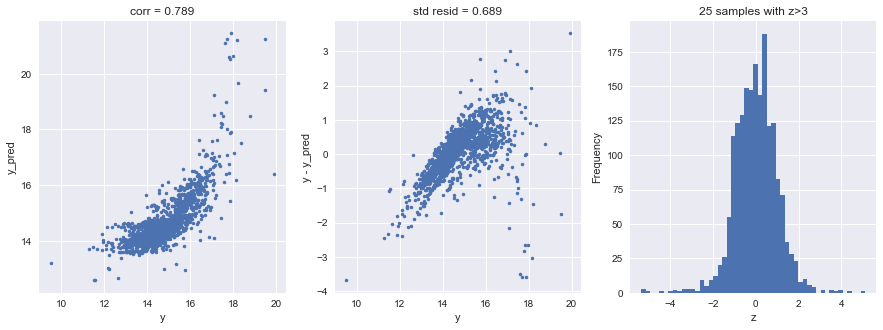

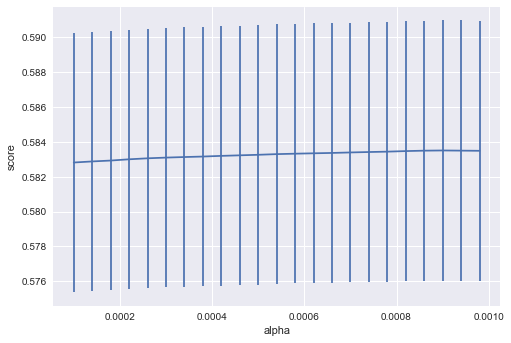

In [467]:
model = 'Lasso'

opt_models[model] = Lasso()
alph_range = np.arange(1e-4,1e-3,4e-5)
param_grid = {'alpha': alph_range}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train,
                                              splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('alpha')
plt.ylabel('score');

# ElasticNet: 

Fitting 25 folds for each of 81 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2018 out of 2025 | elapsed:  3.5min remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed:  3.5min finished


Time Taken : 212.19615507125854 seconds
----------------------
ElasticNet(alpha=0.0009000000000000001, copy_X=True, fit_intercept=True,
           l1_ratio=0.9, max_iter=100000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)
----------------------
score= 0.622833368001114
mean_squared_error = 0.6885356449432556
cross_val: mean= 0.5857200688343284 , std= 0.046893852916495095


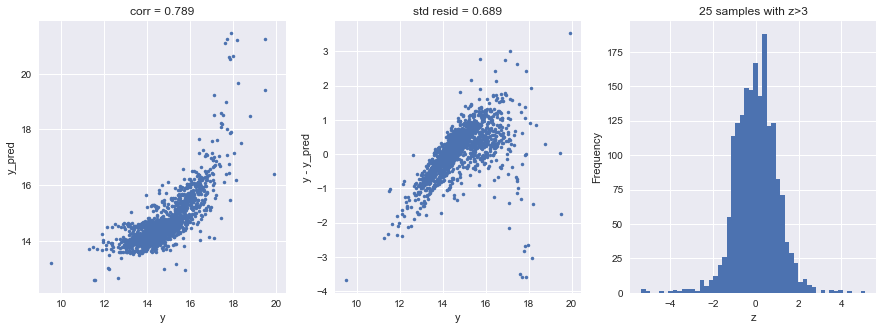

In [468]:
model ='ElasticNet'
opt_models[model] = ElasticNet()

param_grid = {'alpha': np.arange(1e-4,1e-3,1e-4),
              'l1_ratio': np.arange(0.1,1.0,0.1),
              'max_iter':[100000]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid,imputed_x_train,y_train, 
                                              splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    5.6s finished


Time Taken : 5.762568473815918 seconds
----------------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')
----------------------
score= 0.8138024210514128
mean_squared_error = 0.48377877589868107
cross_val: mean= 0.6808544284847678 , std= 0.031943872941071344


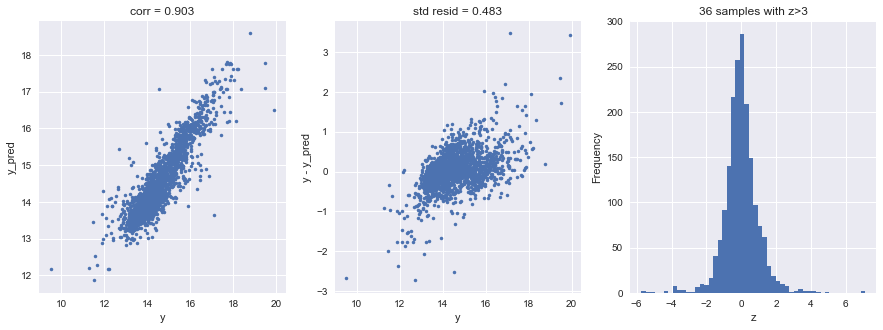

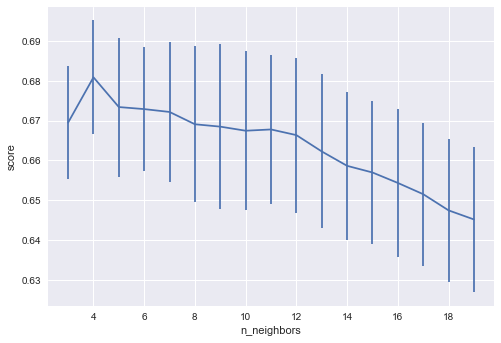

In [469]:
model = 'KNeighbors'
opt_models[model] = KNeighborsRegressor()

param_grid = {'n_neighbors':np.arange(3,20,1)}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train,
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(np.arange(3,20,1), abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*1))
plt.xlabel('n_neighbors')
plt.ylabel('score');

# Forets Aleatoires:

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.5min finished


Time Taken : 89.19093704223633 seconds
----------------------
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
----------------------
score= 0.9319769205694195
mean_squared_error = 0.2924071182972078
cross_val: mean= 0.7729827245273818 , std= 0.0312693567291029


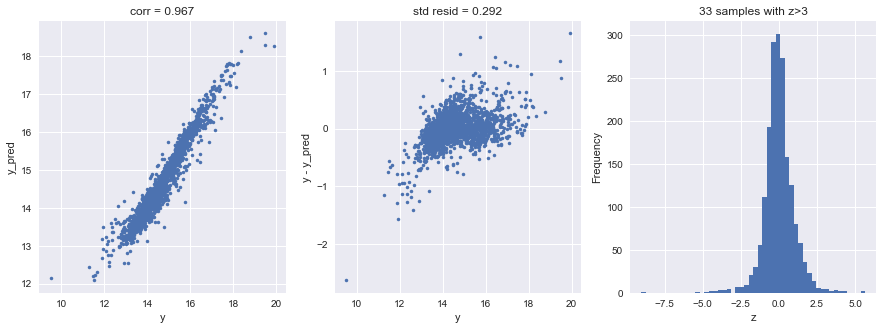

In [470]:
# Tree_Based 
# Random Forest

model = 'RandomForest'
opt_models[model] = RandomForestRegressor()

param_grid = {'n_estimators':[100,150,500], # nbre d'arbre 
              'max_features':[0.5, 0.75, 1.0],
              'min_samples_split':[2,4,6]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits=5, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   19.6s finished


Time Taken : 19.94666051864624 seconds
----------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=1,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
----------------------
score= 0.8107841057673698
mean_squared_error = 0.4876841081078582
cross_val: mean= 0.7680773867036773 , std= 0.028577951690008256


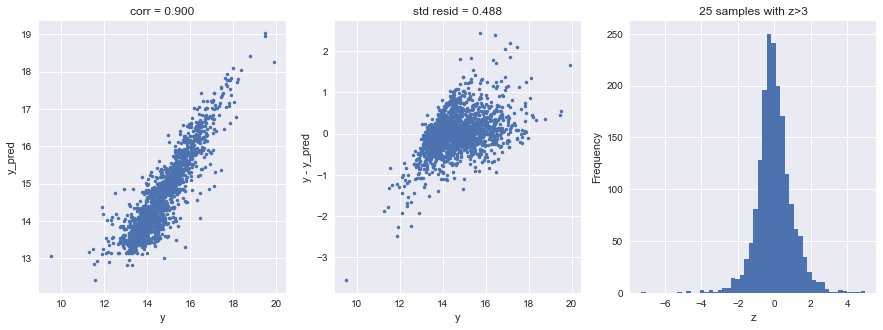

In [471]:
# XGBoost
model = 'XGB'
opt_models[model] = XGBRegressor()

param_grid = {'n_estimators':[100,200,300,400,500],
              'max_depth':[1,2,3],
             }

opt_models[model], cv_score,grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

# Gradient Boosting 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   25.8s finished


Time Taken : 26.375423908233643 seconds
----------------------
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=350,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
----------------------
score= 0.8077538347790054
mean_squared_error = 0.4915736998350016
cross_val: mean= 0.7665635797823678 , std= 0.03841330128185992


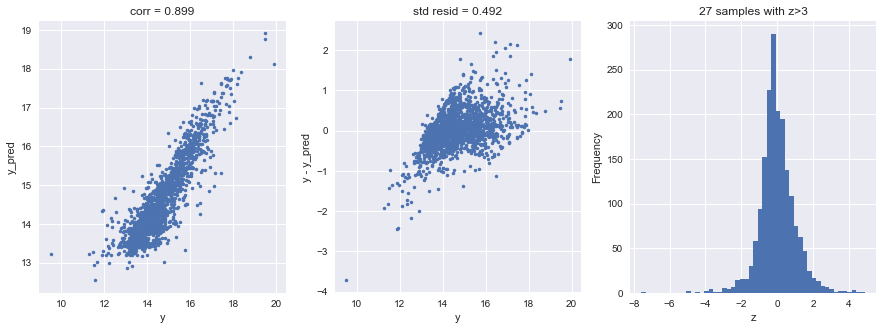

In [472]:
model = 'GradientBoosting'
opt_models[model] = GradientBoostingRegressor()

param_grid = {'n_estimators':[150,250,350],
              'max_depth':[1,2,3],
              'min_samples_split':[5,6,7]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

# SVM
## No Linear

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   26.1s finished


Time Taken : 26.503124713897705 seconds
----------------------
SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
----------------------
score= 0.8199098245565394
mean_squared_error = 0.47577849369128905
cross_val: mean= 0.707183266092347 , std= 0.0428510324842541


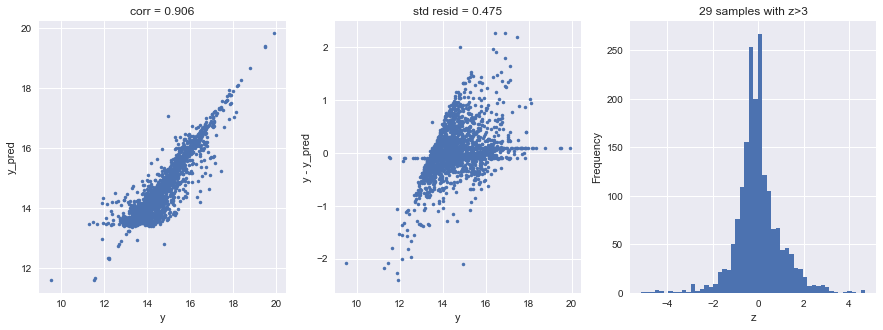

In [473]:
#Non_linear
model ='SVR'
opt_models[model] = SVR()

param_grid = {'C':np.arange(1,21,2),
              'kernel':['poly','rbf','sigmoid'],
              'gamma':['auto']}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train,  
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

# Linear: 

Fitting 25 folds for each of 9 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   11.9s finished


Time Taken : 12.033820390701294 seconds
----------------------
LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=100000,
          random_state=None, tol=0.0001, verbose=0)
----------------------
score= 0.5430835077836971
mean_squared_error = 0.7578412025496666
cross_val: mean= 0.024235294080903476 , std= 0.4848279013204327


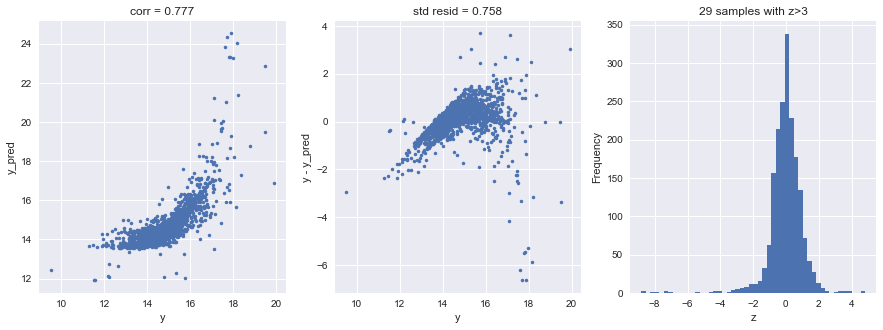

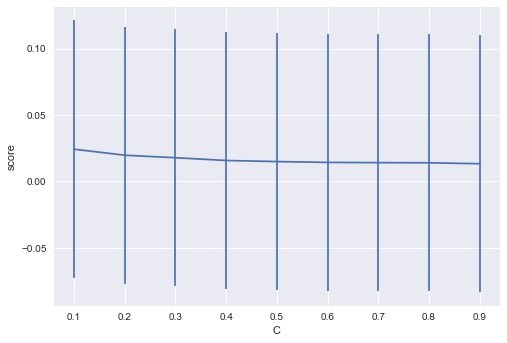

In [474]:
# Linear
model='LinearSVR'
opt_models[model] = LinearSVR()

crange = np.arange(0.1,1.0,0.1)
param_grid = {'C':crange,
             'max_iter':[100000]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid,imputed_x_train,y_train, 
                                              splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(crange, abs(grid_results['mean_test_score']),abs(grid_results['std_test_score'])/np.sqrt(splits*repeats))
plt.xlabel('C')
plt.ylabel('score');

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   46.0s finished


Time Taken : 46.81111741065979 seconds
----------------------
MLPRegressor(activation='relu', alpha=50, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(7, 7, 7), learning_rate='invscaling',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
----------------------
score= 0.7961378750204929
mean_squared_error = 0.5062069107206897
cross_val: mean= 0.7518533788880378 , std= 0.04581123157832593


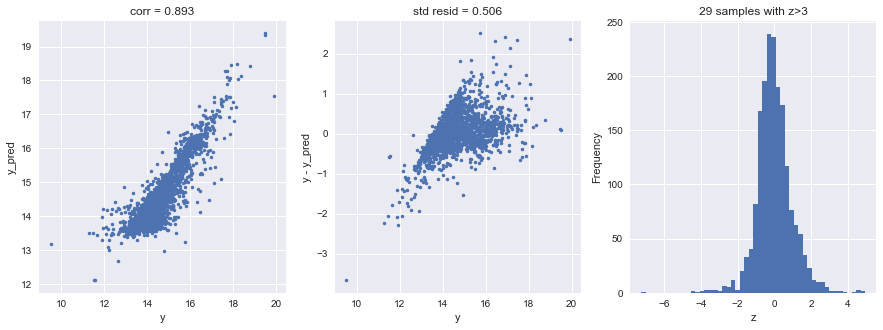

In [475]:
model = 'MLP'
opt_models[model] = MLPRegressor()
print(MLPRegressor().get_params().keys())
param_grid = {'alpha': [0.001, 0.01, 0.1, 50, 100, 200, 300],
              'hidden_layer_sizes': [(5),(10,10),(7,7,7)],
              'solver': ['lbfgs'],
              'activation': ['relu', 'tanh'],
              'learning_rate' : ['constant', 'invscaling']}


opt_models[model], cv_score,grid_results = train_model(opt_models[model], param_grid, imputed_x_train,y_train, 
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

,mean,std
LinearSVR,0.024235,0.484828
Lasso,0.583506,0.037287
Ridge,0.584439,0.040254
ElasticNet,0.585720,0.046894
KNeighbors,0.680854,0.031944
SVR,0.707183,0.042851
MLP,0.751853,0.045811
GradientBoosting,0.766564,0.038413
XGB,0.768077,0.028578
RandomForest,0.772983,0.031269


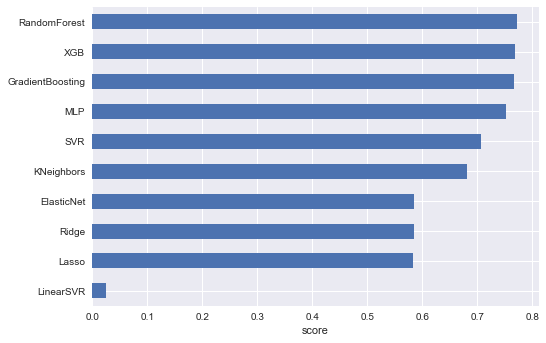

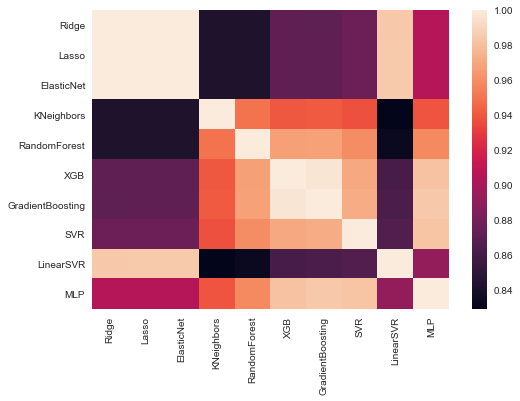

In [476]:
Y_models = pd.DataFrame(index=y_train.index)    
for key, model in opt_models.items():
    #if key!= 'MLP':
    Y_models[key] = model.predict(imputed_x_train)

corr_models = pd.DataFrame(Y_models).corr()

score_models = score_models.sort_values(by='mean')

display(score_models)
score_models['mean'].plot.barh()
plt.xlabel('score')

plt.figure()
sns.heatmap(corr_models)

In [477]:
## List of ML Algorithms, we will use for loop for each algorithms in test Data .
best_regressors = [  RandomForestRegressor( max_features=0.5, min_samples_split=6, n_estimators=500,  random_state = 0),
                     GradientBoostingRegressor(max_depth=2, min_samples_split=5, n_estimators=150, random_state = 0),     
                     MLPRegressor(activation='relu',alpha=50,hidden_layer_sizes=(7, 7, 7), learning_rate='invscaling',  solver='lbfgs',random_state = 0)
         ]


#On prépare le taleau de synthèse
df_results = pd.DataFrame(columns=["Modeles", "y_test", "y_pred" ,"Error%"])
#Entrainement des modèles
df_temp, T = prediction(imputed_x_train, imputed_x_test, y_train, y_test, best_regressors)
df_results = pd.concat([df_results, df_temp], sort=False)
df_results


,Modeles,y_test,y_pred,Error%
0,RandomForestRegressor,13.929964,13.992779,0.450936
1,RandomForestRegressor,16.621326,16.600552,0.124982
2,RandomForestRegressor,13.126863,13.496347,2.814716
3,RandomForestRegressor,14.767409,14.406803,2.441903
4,RandomForestRegressor,13.936766,14.217614,2.015162
...,...,...,...,...
784,MLPRegressor,16.151823,13.666575,15.386798
785,MLPRegressor,14.666727,13.998934,4.553119
786,MLPRegressor,15.357489,14.246758,7.232501
787,MLPRegressor,14.509398,13.703440,5.554734


In [478]:

#Création d'un tableau avec les résultats moyens de chaque modèle
lst_modeles = df_results["Modeles"].unique()

rmse = []
mean_absolute_percentage_error = []
mean_squared_error = []
median_percent_err=[]
r2 = []

df_analyse = pd.DataFrame()


for modele in lst_modeles:
    print(modele)
    
    df_temp = df_results[df_results["Modeles"] == modele]
    rmse.append(round(np.sqrt(metrics.mean_squared_error(df_temp["y_test"], df_temp["y_pred"])),3))
    mean_absolute_percentage_error.append(round(df_temp["Error%"].mean(),3))
    median_percent_err.append(round(df_temp["Error%"].median(),3))
    
    r2.append(round(r2_score(df_temp["y_test"], df_temp["y_pred"]),3))
    print(r2)
    #mean_absolute_percentage_error.append(round(mean_absolute_percentage_error(df_temp["y_test"], df_temp["y_pred"]),3))
    mean_squared_error.append(round(metrics.mean_squared_error(df_temp["y_test"], df_temp["y_pred"]),3))
    
df_analyse["Modeles"] = lst_modeles  
df_analyse["RMSE"] = rmse
df_analyse["mean_absolute_percentage_error"] = mean_absolute_percentage_error
df_analyse["mean_squared_error"] = mean_squared_error
df_analyse["R2"] = r2
df_analyse['Time']= T

df_analyse

RandomForestRegressor
[0.779]
GradientBoostingRegressor
[0.779, 0.792]
MLPRegressor
[0.779, 0.792, 0.784]


,Modeles,RMSE,mean_absolute_percentage_error,mean_squared_error,R2,Time
0,RandomForestRegressor,0.519,2.442,0.269,0.779,2.559154
1,GradientBoostingRegressor,0.503,2.376,0.253,0.792,0.317150
2,MLPRegressor,0.513,2.486,0.263,0.784,0.613435


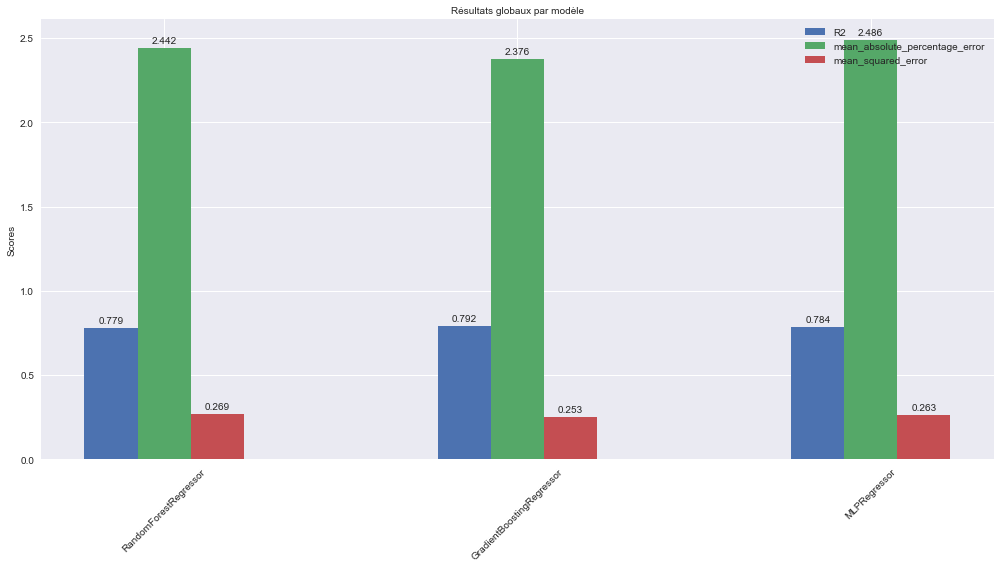

In [479]:
labels = df_analyse["Modeles"].unique()
    
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(14,8))
rects1 = ax.bar(x - width, df_analyse["R2"], width, label='R2')
rects2 = ax.bar(x, df_analyse["mean_absolute_percentage_error"], width, label='mean_absolute_percentage_error')
rects3 = ax.bar(x + width, df_analyse["mean_squared_error"], width, label='mean_squared_error')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', size=10)
ax.set_title('Résultats globaux par modèle', size=10)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# Feature importance:

---------------------------------------
3 zero coefficients
31 non-zero coefficients
---------------------------------------
Intercept:  14.568390403056675
---------------------------------------
Top 20 contributers to increased TotalGHGEmissions:
---------------------------------------
PropertyGFABuilding(s)       0.384623
PropertyGFATotal             0.238831
PrimaryPropertyType          0.205147
LargestPropertyUseType_14    0.201333
LargestPropertyUseType_6     0.109549
LargestPropertyUseType_13    0.072319
LargestPropertyUseType_11    0.068797
LargestPropertyUseType_9     0.053082
ComplianceStatus_1           0.050136
LargestPropertyUseType_1     0.041317
LargestPropertyUseType_16    0.041273
LargestPropertyUseType_21    0.031448
Neighborhood                 0.022895
LargestPropertyUseType_10    0.021038
NumberofFloors               0.018825
NumberofBuildings            0.008394
LargestPropertyUseType_5     0.002499
LargestPropertyUseType_4     0.000000
PropertyGFAParking          

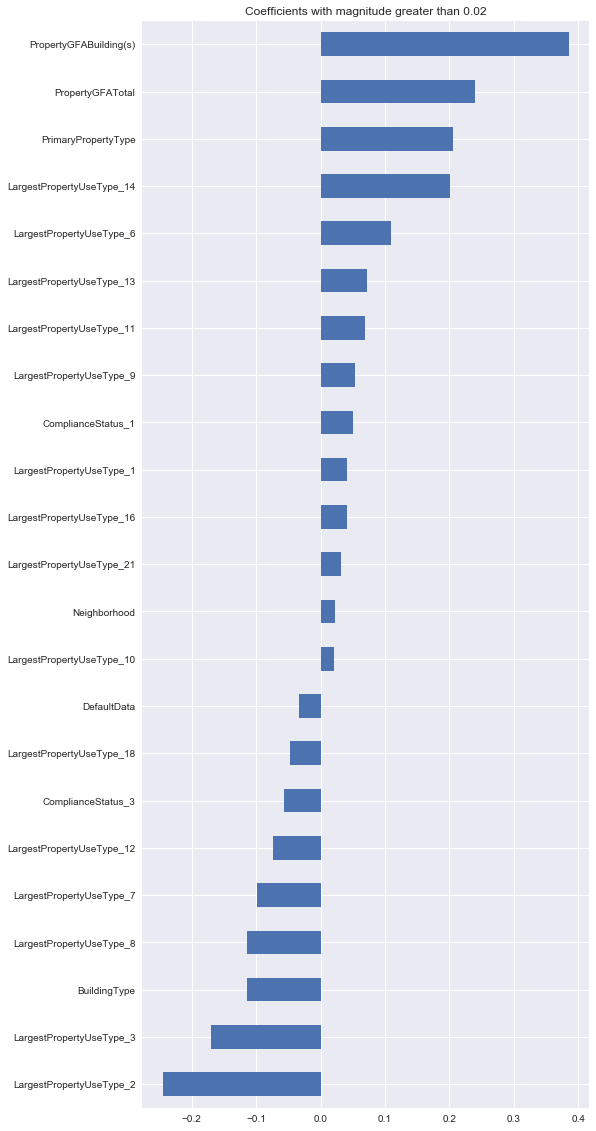

In [480]:
# feature important!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Best model is XGB
#Coefficients are only defined when the linear model is chosen as base learner (booster=gblinear). It is not defined for other base learner types, such as tree learners (booster=gbtree).
# get coefficients from previously optimised ElasticNet model
en_coefs = pd.Series(opt_models['Lasso'].coef_,index=X.columns)

plt.figure(figsize=(8,20))
en_coefs[en_coefs.abs()>0.02].sort_values().plot.barh()
plt.title('Coefficients with magnitude greater than 0.02')

print('---------------------------------------')
print(sum(en_coefs==0),'zero coefficients')
print(sum(en_coefs!=0),'non-zero coefficients')
print('---------------------------------------')
print('Intercept: ',opt_models['Lasso'].intercept_)
print('---------------------------------------')
print('Top 20 contributers to increased TotalGHGEmissions:')
print('---------------------------------------')
print(en_coefs.sort_values(ascending=False).head(20))
print('---------------------------------------')
print('Top 10 contributers to decreased TotalGHGEmissions:')
print('---------------------------------------')
print(en_coefs.sort_values(ascending=True).head(10))
print('---------------------------------------')
print('Zero coefficients:')
print('---------------------------------------')
print(en_coefs[en_coefs==0].index.sort_values().tolist())




Features importances - RandomForestRegressor
PropertyGFATotal             0.441047
PropertyGFABuilding(s)       0.285097
PrimaryPropertyType          0.048938
NumberofFloors               0.047500
LargestPropertyUseType_14    0.035315
PropertyGFAParking           0.027857
Neighborhood                 0.022112
LargestPropertyUseType_2     0.018584
LargestPropertyUseType_3     0.012666
BuildingType                 0.012286
dtype: float64

Features importances - GradientBoostingRegressor
PropertyGFATotal             0.666338
PropertyGFABuilding(s)       0.159987
LargestPropertyUseType_14    0.044150
LargestPropertyUseType_2     0.038380
PrimaryPropertyType          0.028878
LargestPropertyUseType_3     0.019357
LargestPropertyUseType_1     0.006031
LargestPropertyUseType_13    0.005429
NumberofFloors               0.004906
LargestPropertyUseType_12    0.004895
dtype: float64

-----------------------------------------------


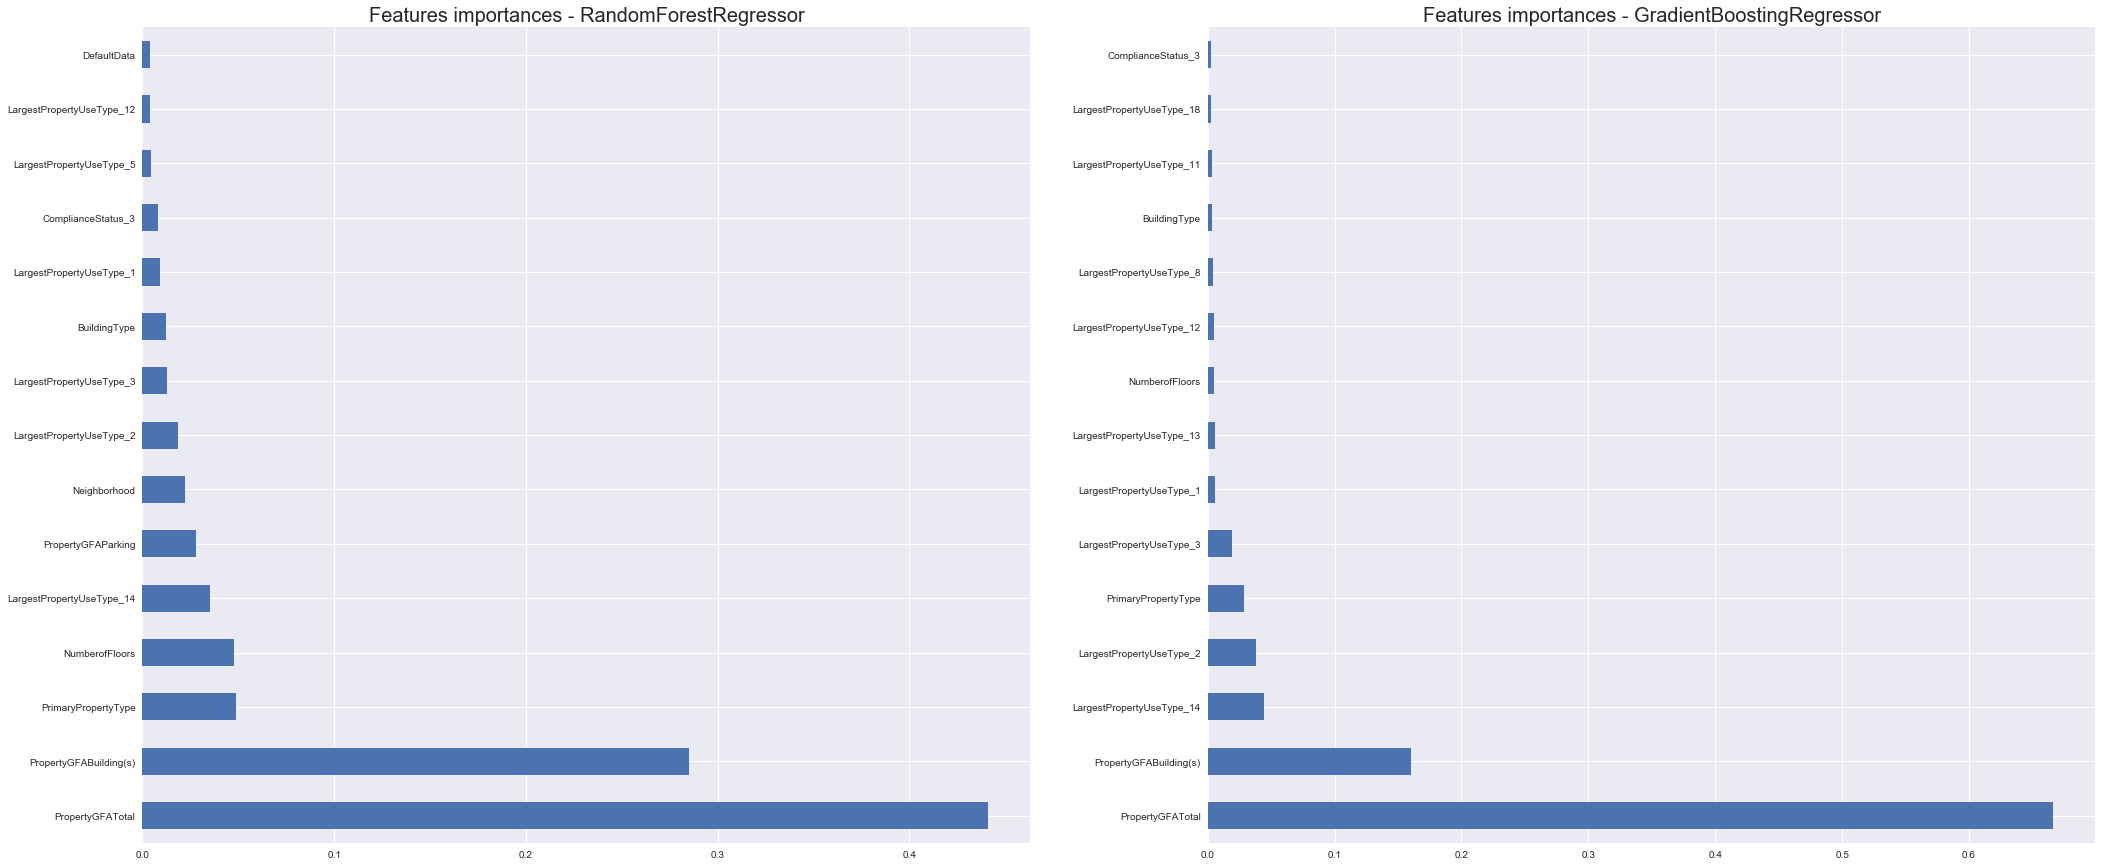

In [481]:
feat_impt_forest = pd.Series(opt_models['RandomForest'].feature_importances_, index=X.columns)
print("Features importances - RandomForestRegressor")
print(feat_impt_forest.nlargest(10))
print("")
feat_impt_GboostR = pd.Series(opt_models['GradientBoosting'].feature_importances_, index=X.columns)
print("Features importances - GradientBoostingRegressor")
print(feat_impt_GboostR.nlargest(10))
print("")
print("-----------------------------------------------")

plt.subplots(figsize=(35,15))
plt.subplot(1, 2, 1)
plt.title("Features importances - RandomForestRegressor", size=20)
feat_impt_forest.nlargest(15).plot(kind='barh')

plt.subplot(1, 2, 2)
plt.title("Features importances - GradientBoostingRegressor", size=20)
feat_impt_GboostR.nlargest(15).plot(kind='barh')

RAPPEL : Il y a 1838 observations dans le dataset d'entrainement.


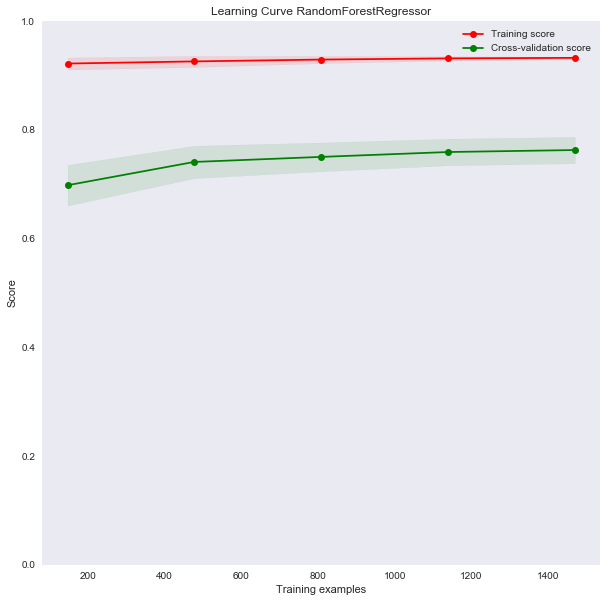

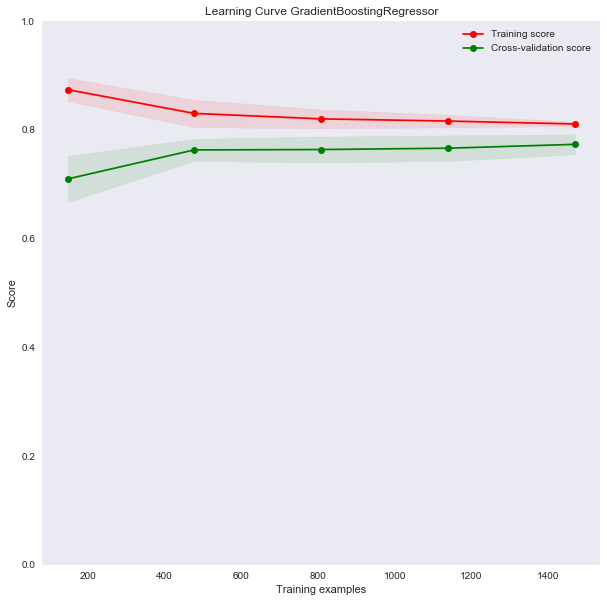

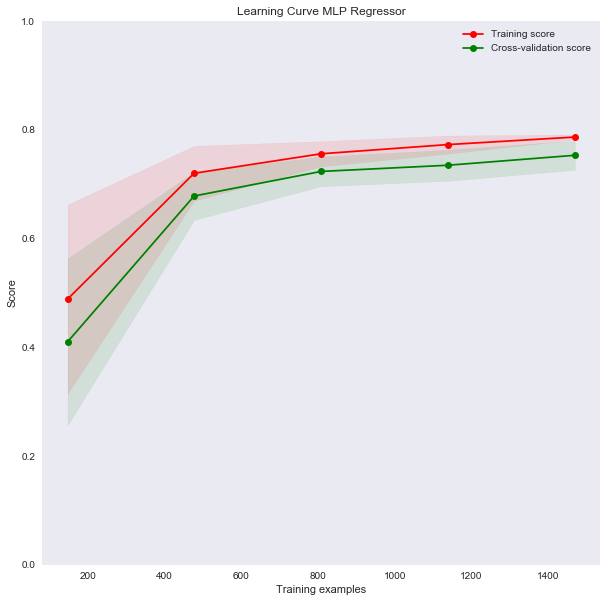

In [482]:
#RANDOMFORESTREGRESSOR
#Paramétrage de la fonction de traçage de la courbe
title = "Learning Curve RandomForestRegressor"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(opt_models['RandomForest'], title, imputed_x_train, y_train, ylim=(0, 1), cv=cv, n_jobs=-1)


#########################################################################################
#GRADIENTBOOSTINGREGRESSOR
#Paramétrage de la fonction de traçage de la courbe
title = "Learning Curve GradientBoostingRegressor"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(opt_models['GradientBoosting'], title, imputed_x_train, y_train, ylim=(0, 1), cv=cv, n_jobs=-1)

#########################################################################################
#MLPREGRESSOR
#Paramétrage de la fonction de traçage de la courbe
title = "Learning Curve MLP Regressor"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(opt_models['MLP'], title, imputed_x_train, y_train, ylim=(0, 1), cv=cv, n_jobs=-1)

print("RAPPEL : Il y a", imputed_x_train.shape[0], "observations dans le dataset d'entrainement.")
